<div style="text-align: center;">

    Universidade Federal do Ceará
    Introdução à Mineração de Dados
    
# 2a parte: Aplicando modelos de aprendizado supervisionado
</div>

<div style="text-align: center;">   
Aluno: Yago Castro dos Reis; Matrícula: 494531.
      
</div>  
<div style="text-align: center;"> 
Professor: Carlos Diego Rodrigues.   
</div>

<a id="Imports"></a>
# 0.Imports

In [1]:
from IPython.core.display import HTML

import pandas as pd
import numpy as np

# Gráficos:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Divisão em treino e teste:
from sklearn.model_selection import train_test_split

# Balanceamento do conjunto de dados:
from imblearn.under_sampling import(
    RandomUnderSampler,
    ClusterCentroids,
    NearMiss
)


from imblearn.over_sampling import (
    RandomOverSampler,
    SMOTE,
    ADASYN
)

# Modelos
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

# Seleção de parâmetros
from sklearn.model_selection import GridSearchCV

# Seleção de Atributos:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

# Métricas de Avaliação
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    ConfusionMatrixDisplay,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    precision_recall_curve
)


# Tempo de execução
import time


<a id="Page"></a>
## 0.1.Formatação da Página

In [2]:
# Código de Cores ANSI
azul = "\033[38;2;10;31;68m"
verde = "\033[38;5;82m"
verde_escuro = "\033[38;2;0;100;0m"
laranja = "\033[38;5;208m"
reset = '\033[0m'

#
HTML('''
<style>
    /* Aplicar fonte monoespaçada a todo o notebook */
    body, div.text_cell_render, div.code_cell pre, h1, h2, h3, h4, p {
        font-family: "Courier New", Consolas, Monaco, monospace; /* Fonte monoespaçada */
    }
    
    /* Estilo para h1 */
    h3{ 
        color: #0a1f44;            /* Cor do texto (azul marinho) */
        background-color: #dcdde1; /* Fundo azul escuro (cinza mais escuro) */
        border-radius: 8px;        /* Bordas arredondadas */
        padding: 10px;
    }
    
    /* Estilo para h2 */
    h1{
        color: #dcdde1;            /* Cor do texto (cinza claro) */
        background-color: #0a1f44; /* Fundo azul escuro (azul marinho) */
        border-radius: 8px;        /* Bordas arredondadas */
        padding: 10px;
    }
    
    /* Estilo para h3 */
    h2{
        color:#dcdde1;            /* Cor do texto (azul mais claro) */
        background-color: #40739e; /* Fundo azul escuro (cinza mais escuro) */
        border-radius: 8px;        /* Bordas arredondadas */
        padding: 10px;
    }
    
    /* Estilo para h4 e h5 */
    h4, h5 {
        background-color:#40739e;  /* Fundo azul marinho */
        color: white;               /* Texto branco */
        border-radius: 8px;         /* Bordas arredondadas */
        padding: 10px;
    }
</style>
''')

# Fonte:

<a id="Data"></a>
## 0.2.Coleta dos Dados

In [3]:
start_time = time.time()
df = pd.read_csv("C:/Users/Yago/Desktop/GitHubLocal/UFC/DataMining/Lista1/L1P2A/data/creditcard.csv")

end_time = time.time()
print(f"Tempo de execução: {end_time - start_time:.4f} segundos")


Tempo de execução: 2.2364 segundos


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<a id="Estudo"></a>
# 1.Compreensão do Estudo

<div style="text-align: justify;">
<strong>O objetivodo trabalho é aplicar técnicas de aprendizado supervisionado para detectar fraudes em transações financeiras com cartão de crédito.</strong> Inicialmente, são construídos e comparados diversos modelos de classificação, como Árvores de Decisão, Regressão Logística, KNN, Floresta Aleatória, SVC, SGDClassifier e Naive Bayes, utilizando métricas como recall, precisão e F1-score para selecionar os modelos mais promissores a serem estudados ao longo do trabalho. <strong>Devido ao alto desbalanceamento dos dados, a métrica recall é priorizada para maximizar a detecção de fraudes reais</strong>, adotando técnicas de balanceamento como undersampling e oversampling para melhorar o desempenho dos modelos.
</div>


<div style="text-align: justify;">

Além da comparação inicial de modelos,  <strong>o foco principal do trabalho está na análise detalhada e no desempenho comparativo dos classificadores de Regressão Logística e Floresta Aleatória.</strong> Esses modelos são treinados e avaliados com diferentes estratégias de balanceamento de classes, empregando métricas como acurácia, precisão, recall e F1-score para medir sua eficácia. A análise de curvas ROC e a métrica AUC também são exploradas para compreender melhor o comportamento desses classificadores.
</div>
<div style="text-align: justify;">
Adicionalmente, <strong> o trabalho realiza um processo de seleção de variáveis (feature selection)</strong>  para identificar os atributos mais relevantes na detecção de fraudes, aprimorando a eficiência e a precisão dos modelos.  <strong>Também são utilizadas validação cruzada e otimização de hiperparâmetros para ajustar os parâmetros dos classificadores</strong>, visando maximizar a performance preditiva. Esse refinamento resulta em uma abordagem mais robusta e confiável para a detecção de fraudes, garantindo que os modelos estejam configurados para alcançar o melhor equilíbrio entre precisão e generalização. 
</div>

<a id="Objetivos"></a>
## 1.1.Objetivos Gerais e Específicos

- Aplicar técnicas de aprendizado supervisionado para identificar fraudes em transações financeiras com cartão de crédito.

- Construir e comparar diversos modelos de classificação (Árvores de Decisão, Regressão Logística, KNN, Floresta Aleatória, SVC, SGDClassifier e Naive Bayes) para avaliar seu desempenho inicial.

- Priorizar o recall como métrica principal para maximizar a detecção de fraudes, dada a alta desproporção entre classes no conjunto de dados.

- Utilizar técnicas de balanceamento de classes, como undersampling e oversampling, para melhorar a performance dos modelos.

- Focar na análise detalhada e no desempenho comparativo dos modelos de Regressão Logística e Floresta Aleatória.

- Empregar métricas como acurácia, precisão, recall e F1-score, além de analisar as curvas ROC e AUC, para avaliar a eficácia dos modelos.

- Realizar seleção de variáveis (feature selection) para identificar os atributos mais relevantes na detecção de fraudes.

- Ajustar hiperparâmetros dos modelos por meio de validação cruzada, buscando otimizar o desempenho preditivo.

- Implementar uma abordagem robusta e generalizável para garantir o melhor equilíbrio entre precisão e generalização nos modelos utilizados.

<a id="Metricas"></a>
## 1.1.Métricas

<div style="text-align: justify;">
<strong>Para o estudo e análise comparativa dos resultados que serão adquiridos, serão consideradas as métricas recall e precisão.</strong> Durante a apresentação dos resultados, também será exibida a acurácia obtida; no entanto, essa não será a principal métrica, <strong>visto que, conforme analisado abaixo, o conjunto de dados apresenta um alto desbalanceamento dos dados da variável alvo. Logo, a acurácia não é a melhor métrica nesses casos.</strong> Como o estudo tem como finalidade identificar todos os casos realmente fraudulentos, a métrica de recall será a mais importante no critério de escolha, sendo sempre balanceada e analisada em conjunto com um valor coerente de precisão.
    </div>

<a id="ConjDados"></a>
# 2.Entendimento do Conjunto de Dados

O presente conjunto de dados que será trabalhado nesse projeto, está disponível no seguinte **[Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)**

<a id="Conteudo"></a>
## Conteúdo

<div style="text-align: justify;">
O conjunto de dados contém transações feitas por cartões de crédito em setembro de 2013 por titulares de cartão europeus. [1]

Este conjunto de dados apresenta **transações que ocorreram em dois dias, onde temos 492 fraudes de 284.807 transações. O conjunto de dados é altamente desbalanceado, a classe positiva (fraudes) é responsável por 0,172% de todas as transações.** [1]
</div>

<div style="text-align: justify;">
Dada a taxa de desequilíbrio de classe, recomendamos medir a precisão usando a Área sob a Curva de Precisão-Recall (AUPRC). A precisão da matriz de confusão não é significativa para classificação desbalanceada. [1]
</div>

<a id="InfoVar"></a>
### Informações sobre as variáveis

<div style="text-align: justify;">
Ele contém apenas variáveis ​​de entrada numéricas que são o resultado de uma transformação PCA. Infelizmente, devido a questões de confidencialidade, não podemos fornecer os recursos originais e mais informações básicas sobre os dados. Os recursos V1, V2, … V28 são os principais componentes obtidos com PCA, os únicos recursos que não foram transformados com PCA são 'Tempo' e 'Valor'. O recurso 'Tempo' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. O recurso 'Amount' é o valor da transação, esse recurso pode ser usado para aprendizado sensível a custos dependente de exemplo. O recurso 'Class' é a variável de resposta e assume o valor 1 em caso de fraude e 0 em caso contrário. [1]
</div>

**Informações da base:**
    
- **'Time'(tempo)**: contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados;

    
- **'Amount'(valor)**: é o valor da transação;

    
- **'Class' (classe)**: é a variável de resposta e assume valor 1 em caso de fraude e 0 caso contrário;


- **Devido a questões de confidencialidade, não podemos fornecer os recursos originais e mais informações básores sobre os dados. Características V1, V2 ... V28 são os princípais componentes obtidos com "PCA"**.
        

<a id = "Agrade"></a>
## Agradecimentos

O conjunto de dados foi coletado e analisado durante uma colaboração de pesquisa da Worldline e do Machine Learning Group (http://mlg.ulb.ac.be) da ULB (Université Libre de Bruxelles) sobre mineração de big data e detecção de fraudes.

Mais detalhes sobre projetos atuais e passados ​​sobre tópicos relacionados estão disponíveis em https://www.researchgate.net/project/Fraud-detection-5 e na página do projeto DefeatFraud

Por favor, cite os seguintes trabalhos:

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson e Gianluca Bontempi. Calibrando probabilidade com subamostragem para classificação desbalanceada. Em Simpósio sobre inteligência computacional e mineração de dados (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Lições aprendidas na detecção de fraudes de cartão de crédito da perspectiva de um profissional, Sistemas especialistas com aplicativos, 41, 10, 4915-4928, 2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Detecção de fraudes de cartão de crédito: uma modelagem realista e uma nova estratégia de aprendizado, Transações IEEE em redes neurais e sistemas de aprendizado, 29, 8, 3784-3797, 2018, IEEE

Dal Pozzolo, Andrea Aprendizado de máquina adaptável para detecção de fraudes de cartão de crédito Tese de doutorado da ULB MLG (supervisionada por G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: uma estrutura escalável para detecção de fraude de cartão de crédito em streaming com Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Estratégias de aprendizado ativo de streaming para detecção de fraude de cartão de crédito na vida real: avaliação e visualização, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Técnicas de adaptação de domínio de aprendizado profundo para detecção de fraude de cartão de crédito, INNSBDDL 2019: Avanços recentes em Big Data e aprendizado profundo, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combinando aprendizado supervisionado e não supervisionado em detecção de fraude de cartão de crédito Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi Aprendizado de máquina reproduzível para detecção de fraude de cartão de crédito - prático Manual

Bertrand Lebichot, Gianmarco Paldino, Wissam Siblini, Liyun He, Frederic Oblé, Gianluca Bontempi Estratégias de aprendizagem incremental para detecção de fraudes em cartões de crédito, IInternational Journal of Data Science and Analytics

<a id = "Analise"></a>
# Análise inicial

<div style="text-align: justify;">
Nesta etapa, será realizada uma análise preliminar do conjunto de dados para compreender suas principais características e identificar possíveis desafios que possam influenciar o desempenho dos modelos de aprendizado supervisionado. O foco inicial é verificar a qualidade e a estrutura dos dados, avaliar a distribuição da variável alvo e definir estratégias para lidar com problemas, como o desbalanceamento de classes.
</div>

In [5]:
df.shape

(284807, 31)

<font color = "blue"> **Comentários:**</font> O conjunto de dados utilizado neste projeto contém 284.807 registros e 31 colunas. 

In [6]:
# Verificnado as informações do dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Resumo estatísticos do conjunto de dados:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<font color = "blue"> **Comentários:**</font> O resumo estatístico inicial sugere uma ampla variação nas variáveis, especialmente em Amount e Time, reforçando a necessidade de normalização ou padronização em etapas posteriores.

In [8]:
# Verificando a existência de valores nulos:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<font color = "blue"> **Comentários:**</font> Indica que todas as colunas possuem valores válidos, sem dados ausentes ou inconsistências.

In [9]:
# Verificando a distribuição da variável alvo(Class):
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
# Apresentando o resultado da distribuição em percentual
percentual = df.Class.value_counts(normalize=True)*100
print(percentual)

0    99.827251
1     0.172749
Name: Class, dtype: float64


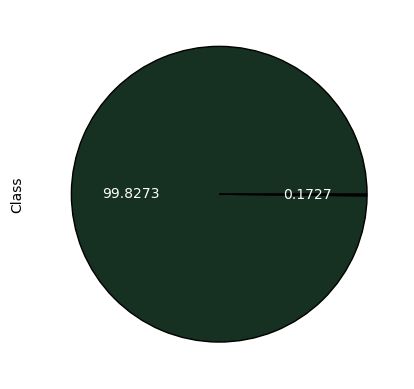

In [11]:
# Apresentando graficamente:

percentual.plot.pie(colors=['#163021', '#000000'], 
                    autopct='%.4f', 
                    textprops={'color': '#ffffff'},  # Cor das labels
                    labels=percentual.index,
                    wedgeprops={'linewidth': 1, 'edgecolor': 'black'});  # Opcional: linha ao redor das fatias

# Atualizando a cor do autopct separadamente
#plt.gca().texts[-3].set_color('black')  # Primeiro texto (autopct)
#plt.gca().texts[-1].set_color('black')  # Segundo texto (autopct, se houver)


<font color = "blue"> **Comentários:**</font>

A análise inicial revela um forte desbalanceamento na variável alvo Class:

- 99,83% das transações são legítimas (classe 0).
- Apenas 0,17% representam fraudes (classe 1).

Esse desbalanceamento exige o uso de técnicas específicas, como o balanceamento das classes, para garantir a eficácia dos modelos de classificação. Caso contrário, o modelo pode apresentar alta acurácia geral, mas com baixa eficiência na identificação de fraudes.

<font color = "blue"> **Comentários:**</font>
A análise inicial do conjunto de dados, composto por 284.807 registros e 31 colunas, revelou características importantes. Foi identificada uma ampla variação nas variáveis, especialmente em Amount e Time, indicando a necessidade de normalização ou padronização em etapas futuras.

A variável alvo Class apresenta um forte desbalanceamento, com 99,83% das transações sendo legítimas e apenas 0,17% fraudulentas. Para mitigar esse problema, será necessário adotar técnicas de balanceamento que garantam um melhor desempenho dos modelos preditivos, principalmente na identificação de fraudes.

<a id = "Escolha"></a>
# Escolha do Modelo de Estudo

<div style="text-align: justify;">
Nesta seção, serão analisados diferentes algoritmos de classificação disponíveis na biblioteca scikit-learn do Python, voltados para o aprendizado supervisionado. O principal objetivo é avaliar o desempenho desses modelos quando aplicados ao conjunto de dados, com ênfase nas métricas curva ROC, recall e precisão. Com base nesses indicadores, serão selecionados os dois modelos com o melhor desempenho geral para a aplicação em questão. Além disso, ao longo das seções do trabalho, será explorado o comportamento desses modelos utilizando diferentes técnicas e abordagens, examinando como as métricas de avaliação variam conforme as estratégias adotadas.

</div>

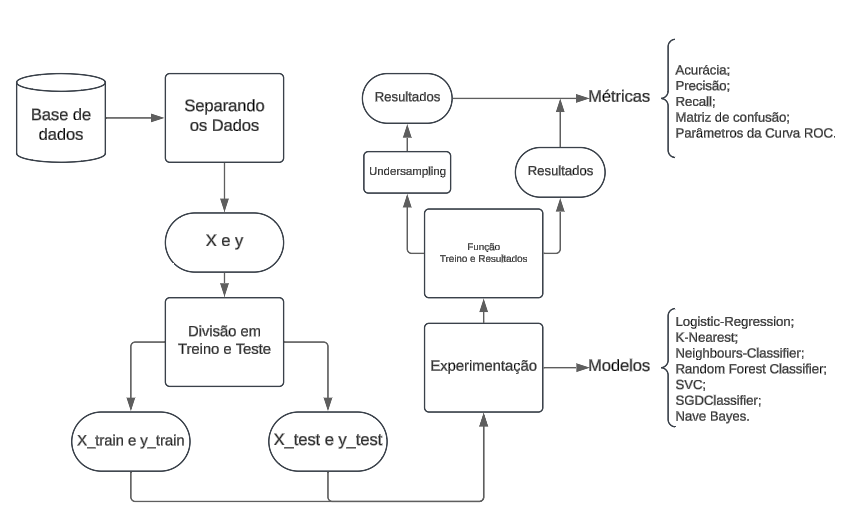

<a id = "Separando"></a>
## Separando os dados em features e label (X e y)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
# Conjunto de dados X:
X = df.drop(columns='Class')
# Conjunto de dados y (variável alvo):
y = df.Class

<a id = "Divisao"></a>
## Divisão dos dados em treinamento e teste

In [14]:
#np.random.seed(42) (também é possível aplicar dessa forma)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [15]:
print(f'Quantidade de dados para treino: {len(X_train):.2f}')
print(f'Quantidade de dados para teste:  {len(X_test):.2f}')

Quantidade de dados para treino: 213605.00
Quantidade de dados para teste:  71202.00


<a id = "Experimentacao"></a>
## Escolhendo e Treinando os Modelos (Experimentação)

In [16]:
# Logistic-Regression
# K-Nearest Neighbours-Classifier
# Random Forest Classifier
# SVC
# SGDClassifier
# Nave Bayes


Decision Trees: 
- https://scikit-learn.org/1.5/modules/tree.html#classification

Logistic Regression: 

- https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

KNN:

- https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Random Florest: 

- https://scikit-learn.org/1.5/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles

SVC: 

- https://scikit-learn.org/1.5/modules/svm.html#classification

SGDClassifier:

- https://scikit-learn.org/1.5/modules/sgd.html#classification

Nave Bayes: 

- https://scikit-learn.org/1.5/modules/naive_bayes.html#gaussian-naive-bayes

In [17]:
np.random.seed(42)

modelos = {
    "Tree": tree.DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "SGDClassifier": SGDClassifier(loss="log", penalty="l2", max_iter=1000, tol=1e-3, random_state=42),
    "GNB": GaussianNB()
}

In [18]:
# Dicionários para armazenar métricas e informações dos modelos
modelos_pontos           = {}  
modelos_precisao         = {}  
modelos_precisao_proba   = {}
modelos_recall           = {}  
modelos_F1               = {}  
modelos_confusion_matriz = {} 
modelos_parametros_curva = {}

In [19]:
# Função para Treinamento dos Modelos e Obtenção das métricas para cada
# modelo quando aplicado aos dados de teste

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
       Função com o objetivo de Treinar e Testar determinados modelos de Machine Learning
       modelos: Um dicionário de diferentes modelos de aprendizado de máquina do scikit-learn
       X_train: 
       X_test :
       y_train:
       y_test :
    """
   
    # Loop para o dicionário dos modelos
    for name, model in modelos.items():
        # Ajustando o modelo aos dados
        model.fit(X_train, y_train)
        # Guardando as pontuações
        modelos_pontos[name] = model.score(X_test, y_test)
        # Calculando a precisão:
        modelos_precisao[name] = precision_score(y_test, model.predict(X_test))
        # Calculando o predict_proba:
        modelos_precisao_proba[name] = model.predict_proba(X_test)[:, 1]
        # Calculando o recall:
        modelos_recall[name] = recall_score(y_test, model.predict(X_test))
        # Calculando o F1:
        modelos_F1[name]     = f1_score(y_test, model.predict(X_test))
        # Obtendo a matriz de confusão:
        modelos_confusion_matriz[name] = confusion_matrix(y_test, model.predict(X_test))
        # Parâmetros curva:
        modelos_parametros_curva[name] = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
       
    return print(f"{laranja}====Acurácia:===={reset}\n{modelos_pontos}\n\n"
      f"{verde_escuro}====Precisão:===={reset}\n{modelos_precisao}\n\n"
      f"{laranja}====Recall:===={reset}\n{modelos_recall}\n\n"
      f"{verde_escuro}====F1:===={reset}\n{modelos_F1}\n\n"
      f"{laranja}====Matriz de confusão:===={reset}\n{modelos_confusion_matriz}\n\n")


In [20]:
df_resultados = pd.DataFrame({
        "Acurácia": modelos_pontos,
        "Precisão": modelos_precisao,
        "Predict_proba": modelos_precisao_proba,
        "Recall": modelos_recall,
        "F1-Score": modelos_F1,
        "Matriz de Confusão": modelos_confusion_matriz,
        "Parametros_curva": modelos_parametros_curva
    })

In [21]:
df_resultados

,Acurácia,Precisão,Predict_proba,Recall,F1-Score,Matriz de Confusão,Parametros_curva


Esta primeira tentativa é com o conjunto de dados original, porém, vamos perceber que, por questões de tempo e pela quantidade de dados, é mais vantajoso aplicar o undersampling para reduzir a quantidade de dados. Veremos que o resultado obtido é semelhante.


In [22]:

start_time = time.time()
#Chamando a função
model_scores = fit_and_score(
                             models = modelos,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train, 
                             y_test = y_test)
model_scores

end_time =time.time()
print(f"Tempo de execução: {end_time - start_time:.4f} segundos")


C:\Users\Yago\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Yago\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

====Acurácia:====
{'Tree': 0.9990871042948232, 'Logistic Regression': 0.9990590151962023, 'KNN': 0.9985112777730962, 'Random Forest': 0.999592708069998, 'SVC': 0.9984129659279234, 'SGDClassifier': 0.9982725204348193, 'GNB': 0.9931181708378978}

====Precisão:====
{'Tree': 0.6904761904761905, 'Logistic Regression': 0.7948717948717948, 'KNN': 1.0, 'Random Forest': 0.9375, 'SVC': 0.0, 'SGDClassifier': 0.0, 'GNB': 0.13957934990439771}

====Recall:====
{'Tree': 0.7699115044247787, 'Logistic Regression': 0.5486725663716814, 'KNN': 0.061946902654867256, 'Random Forest': 0.7964601769911505, 'SVC': 0.0, 'SGDClassifier': 0.0, 'GNB': 0.6460176991150443}

====F1:====
{'Tree': 0.7280334728033474, 'Logistic Regression': 0.6492146596858639, 'KNN': 0.11666666666666665, 'Random Forest': 0.861244019138756, 'SVC': 0.0, 'SGDClassifier': 0.0, 'GNB': 0.229559748427673}

====Matriz de confusão:====
{'Tree': array([[71050,    39],
       [   26,    87]], dtype=int64), 'Logistic Regression': array([[71073,    1

<a id = "AplicandoUnder"></a>
## Aplicando Undersampling nos Dados

In [23]:
# Aplica o undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

In [24]:
# Verifique a distribuição das classes após o undersampling
print("Distribuição das classes após undersampling:")
print(y_train_res.value_counts())

Distribuição das classes após undersampling:
0    379
1    379
Name: Class, dtype: int64


In [25]:
start_time = time.time()
#Chamando a função
model_scores = fit_and_score(
                             models = modelos,
                             X_train = X_train_res,
                             X_test = X_test,
                             y_train = y_train_res, 
                             y_test = y_test)
model_scores

end_time =time.time()
print(f"Tempo de execução: {(end_time - start_time)/60:.4f} min")

C:\Users\Yago\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Yago\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

====Acurácia:====
{'Tree': 0.8884722339260133, 'Logistic Regression': 0.9458161287604281, 'KNN': 0.6547568888514368, 'Random Forest': 0.9720232577736581, 'SVC': 0.4827252043481925, 'SGDClassifier': 0.001587034072076627, 'GNB': 0.9862784753237268}

====Precisão:====
{'Tree': 0.01257783312577833, 'Logistic Regression': 0.026309132304578802, 'KNN': 0.002642383836741331, 'Random Forest': 0.049400479616306954, 'SVC': 0.0016828619510341459, 'SGDClassifier': 0.001587034072076627, 'GNB': 0.08058252427184466}

====Recall:====
{'Tree': 0.8938053097345132, 'Logistic Regression': 0.9203539823008849, 'KNN': 0.5752212389380531, 'Random Forest': 0.911504424778761, 'SVC': 0.5486725663716814, 'SGDClassifier': 1.0, 'GNB': 0.7345132743362832}

====F1:====
{'Tree': 0.02480658234066069, 'Logistic Regression': 0.05115592720118053, 'KNN': 0.005260602136613791, 'Random Forest': 0.09372156505914468, 'SVC': 0.00335543228250575, 'SGDClassifier': 0.003169038771646918, 'GNB': 0.1452318460192476}

====Matriz de con

In [26]:
df_resultados = pd.DataFrame({
        "Acurácia": modelos_pontos,
        "Precisão": modelos_precisao,
        "Predict_proba": modelos_precisao_proba,
        "Recall": modelos_recall,
        "F1-Score": modelos_F1,
        "Matriz de Confusão": modelos_confusion_matriz,
        "Parametros_curva": modelos_parametros_curva
    })

In [27]:
df_resultados

,Acurácia,Precisão,Predict_proba,Recall,F1-Score,Matriz de Confusão,Parametros_curva
Tree,0.888472,0.012578,"[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.893805,0.024807,"[[63160, 7929], [12, 101]]","([0.001587034072076627, 0.01257783312577833, 1..."
Logistic Regression,0.945816,0.026309,"[1.0, 0.16208559045141074, 0.15970652758842235...",0.920354,0.051156,"[[67240, 3849], [9, 104]]","([0.00213889572410138, 0.002120007571455612, 0..."
KNN,0.654757,0.002642,"[0.8, 0.4, 1.0, 0.2, 0.2, 0.8, 0.6, 0.2, 0.4, ...",0.575221,0.005261,"[[46555, 24534], [48, 65]]","([0.001587034072076627, 0.001697739491306945, ..."
Random Forest,0.972023,0.049400,"[1.0, 0.24, 0.14, 0.11, 0.0, 0.2, 0.0, 0.06, 0...",0.911504,0.093722,"[[69107, 1982], [10, 103]]","([0.0030728231902974927, 0.003313707506139235,..."
SVC,0.482725,0.001683,"[0.5753702779857958, 0.5726874391671888, 0.580...",0.548673,0.003355,"[[34309, 36780], [51, 62]]","([0.001632381832890327, 0.001617959348771362, ..."
SGDClassifier,0.001587,0.001587,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000,0.003169,"[[0, 71089], [0, 113]]","([0.001587034072076627, 1.0], [1.0, 0.0], [1.0])"
GNB,0.986278,0.080583,"[1.0, 7.457585713510287e-10, 1.214949512796505...",0.734513,0.145232,"[[70142, 947], [30, 83]]","([0.0025076561182370955, 0.002485519628947427,..."


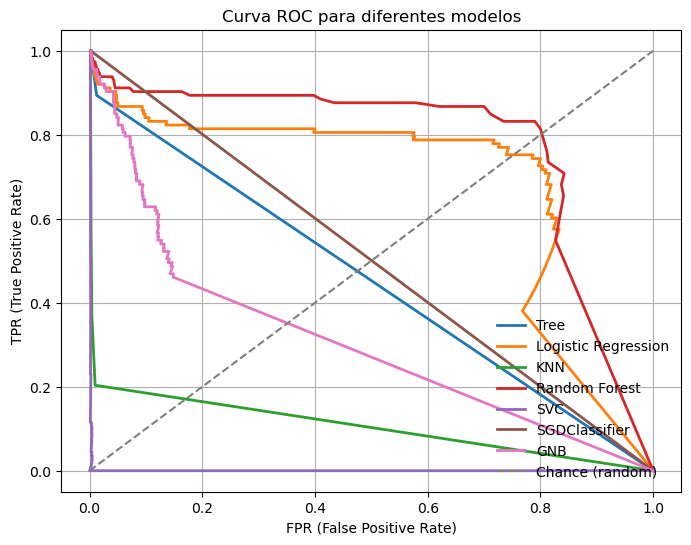

In [28]:
# Criando uma figura para o gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Iterando sobre as linhas do DataFrame
for index, row in df_resultados.iterrows():
    modelo = index  # Nome do modelo
    parametros_curva = row['Parametros_curva']  # Lista com FPR e TPR
    
    # Verificando se parametros_curva contém pelo menos 2 elementos: [fpr, tpr]
    if len(parametros_curva) >= 2:
        fpr = parametros_curva[0]  # False Positive Rate
        tpr = parametros_curva[1]  # True Positive Rate
        
        # Plotando a curva ROC para o modelo
        ax.plot(fpr, tpr, label=modelo, linewidth=2.0)

# Adicionando a linha de chance
ax.plot([0, 1], [0, 1], linestyle='--', label='Chance (random)')

# Configurações do gráfico com cor personalizada
ax.set_xlabel('FPR (False Positive Rate)', color='black')
ax.set_ylabel('TPR (True Positive Rate)', color='black')
ax.set_title('Curva ROC para diferentes modelos', color='black')
legend = ax.legend(loc='lower right', frameon=False)
#plt.setp(legend.get_texts(), color='#d1cfd0')  # Alterando a cor do texto da legenda
ax.grid(True)

# Exibindo o gráfico
plt.show()


In [29]:
df_one = df_resultados

In [30]:
df_one

,Acurácia,Precisão,Predict_proba,Recall,F1-Score,Matriz de Confusão,Parametros_curva
Tree,0.888472,0.012578,"[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.893805,0.024807,"[[63160, 7929], [12, 101]]","([0.001587034072076627, 0.01257783312577833, 1..."
Logistic Regression,0.945816,0.026309,"[1.0, 0.16208559045141074, 0.15970652758842235...",0.920354,0.051156,"[[67240, 3849], [9, 104]]","([0.00213889572410138, 0.002120007571455612, 0..."
KNN,0.654757,0.002642,"[0.8, 0.4, 1.0, 0.2, 0.2, 0.8, 0.6, 0.2, 0.4, ...",0.575221,0.005261,"[[46555, 24534], [48, 65]]","([0.001587034072076627, 0.001697739491306945, ..."
Random Forest,0.972023,0.049400,"[1.0, 0.24, 0.14, 0.11, 0.0, 0.2, 0.0, 0.06, 0...",0.911504,0.093722,"[[69107, 1982], [10, 103]]","([0.0030728231902974927, 0.003313707506139235,..."
SVC,0.482725,0.001683,"[0.5753702779857958, 0.5726874391671888, 0.580...",0.548673,0.003355,"[[34309, 36780], [51, 62]]","([0.001632381832890327, 0.001617959348771362, ..."
SGDClassifier,0.001587,0.001587,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000,0.003169,"[[0, 71089], [0, 113]]","([0.001587034072076627, 1.0], [1.0, 0.0], [1.0])"
GNB,0.986278,0.080583,"[1.0, 7.457585713510287e-10, 1.214949512796505...",0.734513,0.145232,"[[70142, 947], [30, 83]]","([0.0025076561182370955, 0.002485519628947427,..."


In [31]:
confusion_matrix_LR1  = [[67240, 3849], [9, 104]]
confusion_matrix_RF1  = [[69107, 1982], [10, 103]]
confusion_matrix_SGD = [[0, 71089], [0, 113]]

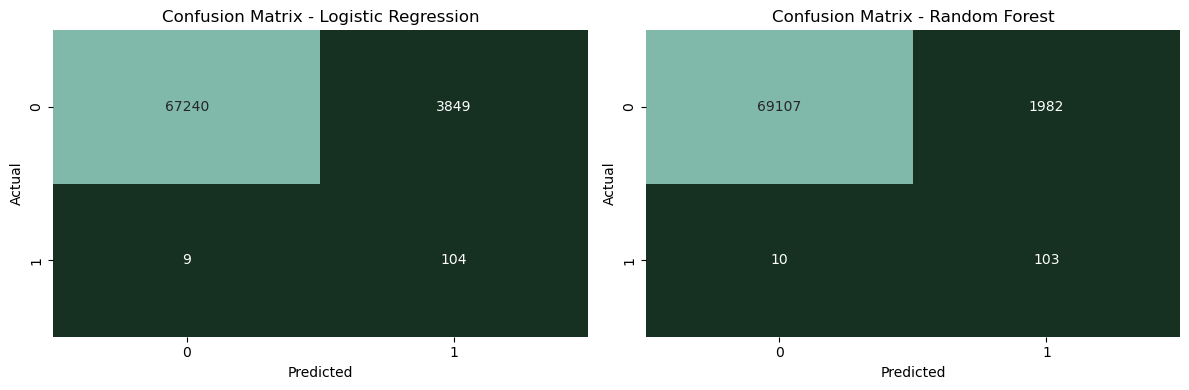

In [32]:
# Criar o subplot com 1 linha e 2 colunas
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Definir a cor personalizada
custom_cmap = mcolors.ListedColormap(['#163021', '#aca79a', '#80b8aa'])  # Cores ajustadas para um efeito suave

# Gráfico da matriz de confusão para Logistic Regression
sns.heatmap(confusion_matrix_LR1, annot=True, fmt="d", cmap=custom_cmap, cbar=False, ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_title("Confusion Matrix - Logistic Regression")

# Gráfico da matriz de confusão para Random Forest
sns.heatmap(confusion_matrix_RF1, annot=True, fmt="d", cmap=custom_cmap, cbar=False, ax=axes[1])
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
axes[1].set_title("Confusion Matrix - Random Forest")

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()

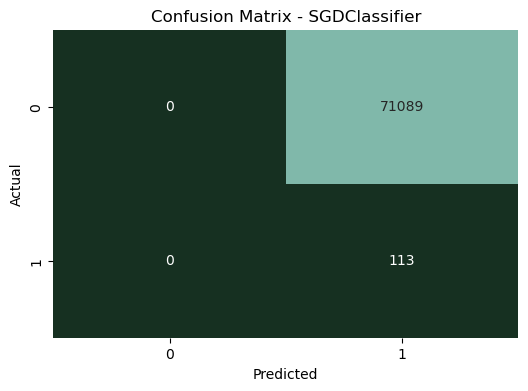

In [33]:

# Criar o gráfico
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_SGD, annot=True, fmt="d", cmap=custom_cmap, cbar=False)

# Adicionar labels e título
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SGDClassifier")
plt.show()

<a id = "AjustandoVar"></a>
## Ajustando os Valores

<font color = "blue"> **Comentários:**</font>
Nesta etapa, serão ajustadas algumas variáveis para verificar novamente o comportamento do treinamento nos algoritmos.

In [34]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [35]:
df['Time'] = df.Time / df.Time.max()

In [36]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,0.548717,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,0.274828,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,0.313681,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,0.490138,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,0.806290,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,1.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [37]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,0.548717,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,0.274828,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,0.313681,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,0.490138,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,0.806290,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,1.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [38]:
df['Amount'] = df['Amount'] / df['Amount'].max()


In [39]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,0.548717,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,0.003439,0.001727
std,0.274828,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.009736,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,0.313681,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000218,0.000000
50%,0.490138,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000856,0.000000
75%,0.806290,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.003004,0.000000
max,1.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,1.000000


In [40]:
# Conjunto de dados X:
X = df.drop(columns='Class')
# Conjunto de dados y (variável alvo):
y = df.Class

# Separando em Treino e Teste:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)

# Quantidade de dados antes do Undersampling:
print(f'Quantidade de dados para treino antes do undersampling: {len(X_train):.2f}')
print(f'Quantidade de dados para teste antes do undersampling:  {len(X_test):.2f}')

# Aplica o undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

# Verifique a distribuição das classes após o undersampling
print("Distribuição das classes após undersampling:")
print(y_train_res.value_counts())

Quantidade de dados para treino antes do undersampling: 213605.00
Quantidade de dados para teste antes do undersampling:  71202.00
Distribuição das classes após undersampling:
0    379
1    379
Name: Class, dtype: int64


In [41]:
start_time = time.time()
#Chamando a função
model_scores = fit_and_score(
                             models = modelos,
                             X_train = X_train_res,
                             X_test = X_test,
                             y_train = y_train_res, 
                             y_test = y_test)
model_scores

end_time =time.time()
print(f"Tempo de execução: {(end_time - start_time)/60:.4f} min")

C:\Users\Yago\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Yago\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

====Acurácia:====
{'Tree': 0.8884722339260133, 'Logistic Regression': 0.9730344653240077, 'KNN': 0.9765034690036797, 'Random Forest': 0.9720232577736581, 'SVC': 0.9842560602230275, 'SGDClassifier': 0.9279935956855144, 'GNB': 0.9622201623549901}

====Precisão:====
{'Tree': 0.01257783312577833, 'Logistic Regression': 0.05161290322580645, 'KNN': 0.058323895809739526, 'Random Forest': 0.049400479616306954, 'SVC': 0.0834710743801653, 'SGDClassifier': 0.019731800766283523, 'GNB': 0.03567567567567568}

====Recall:====
{'Tree': 0.8938053097345132, 'Logistic Regression': 0.9203539823008849, 'KNN': 0.911504424778761, 'Random Forest': 0.911504424778761, 'SVC': 0.8938053097345132, 'SGDClassifier': 0.911504424778761, 'GNB': 0.8761061946902655}

====F1:====
{'Tree': 0.02480658234066069, 'Logistic Regression': 0.09774436090225563, 'KNN': 0.1096327833954231, 'Random Forest': 0.09372156505914468, 'SVC': 0.1526832955404384, 'SGDClassifier': 0.038627414213388334, 'GNB': 0.06855955678670361}

====Matriz d

In [42]:
df_resultados = pd.DataFrame({
        "Acurácia": modelos_pontos,
        "Precisão": modelos_precisao,
        "Predict_proba": modelos_precisao_proba,
        "Recall": modelos_recall,
        "F1-Score": modelos_F1,
        "Matriz de Confusão": modelos_confusion_matriz,
        "Parametros_curva": modelos_parametros_curva
    })

In [43]:
df_resultados

,Acurácia,Precisão,Predict_proba,Recall,F1-Score,Matriz de Confusão,Parametros_curva
Tree,0.888472,0.012578,"[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.893805,0.024807,"[[63160, 7929], [12, 101]]","([0.001587034072076627, 0.01257783312577833, 1..."
Logistic Regression,0.973034,0.051613,"[1.0, 0.03483747894695824, 0.02964102708890918...",0.920354,0.097744,"[[69178, 1911], [9, 104]]","([0.0027238104420768453, 0.0026997710015668314..."
KNN,0.976503,0.058324,"[1.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.911504,0.109633,"[[69426, 1663], [10, 103]]","([0.001587034072076627, 0.006678209250556517, ..."
Random Forest,0.972023,0.049400,"[1.0, 0.24, 0.14, 0.11, 0.0, 0.2, 0.0, 0.06, 0...",0.911504,0.093722,"[[69107, 1982], [10, 103]]","([0.0030728231902974927, 0.003313707506139235,..."
SVC,0.984256,0.083471,"[0.9843426149621611, 0.038275648596097875, 0.0...",0.893805,0.152683,"[[69980, 1109], [12, 101]]","([0.005693268843208384, 0.005643170252431098, ..."
SGDClassifier,0.927994,0.019732,"[1.0, 1.7796124843959454e-09, 7.45189293384509...",0.911504,0.038627,"[[65972, 5117], [10, 103]]","([0.001773188758297111, 0.0017575244013432508,..."
GNB,0.962220,0.035676,"[1.0, 7.296557644118463e-13, 4.941374942214624...",0.876106,0.068560,"[[68413, 2676], [14, 99]]","([0.0020862565541688205, 0.0020678322840315343..."


In [44]:
df_resultados = pd.DataFrame({
        "Acurácia": modelos_pontos,
        "Precisão": modelos_precisao,
        "Predict_proba": modelos_precisao_proba,
        "Recall": modelos_recall,
        "F1-Score": modelos_F1,
        "Matriz de Confusão": modelos_confusion_matriz,
        "Parametros_curva": modelos_parametros_curva
    })

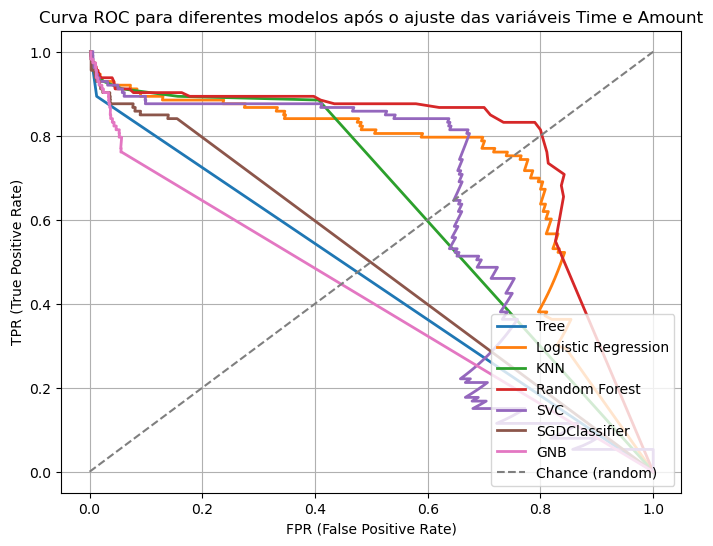

In [45]:
# Criando uma figura para o gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Iterando sobre as linhas do DataFrame
for index, row in df_resultados.iterrows():
    modelo = index # Nome do modelo, se essa coluna existir
    parametros_curva = row['Parametros_curva']  # Lista com FPR e TPR
    
    # Verificando se parametros_curva contém pelo menos 2 elementos: [fpr, tpr]
    if len(parametros_curva) >= 2:
        fpr = parametros_curva[0]  # A lista de False Positive Rate
        tpr = parametros_curva[1]  # A lista de True Positive Rate
        
        # Plotando a curva ROC para o modelo
        ax.plot(fpr, tpr, label=modelo, linewidth=2.0)

# Adicionando a linha de chance (linha diagonal)
ax.plot([0, 1], [0, 1], linestyle='--', label='Chance (random)')

# Configurações do gráfico
ax.set_xlabel('FPR (False Positive Rate)')
ax.set_ylabel('TPR (True Positive Rate)')
ax.set_title('Curva ROC para diferentes modelos após o ajuste das variáveis Time e Amount')
ax.legend(loc='lower right')
ax.grid(True)

# Exibindo o gráfico
plt.show()

In [46]:
print(f"{df_resultados.index[1]} \n, {df_resultados['Matriz de Confusão'][1]}")
print(f"{df_resultados.index[3]} \n, {df_resultados['Matriz de Confusão'][3]}")


Logistic Regression 
, [[69178  1911]
 [    9   104]]
Random Forest 
, [[69107  1982]
 [   10   103]]


In [47]:
confusion_matrix_LR2  = [[69170, 1911], [9, 104]]
confusion_matrix_RF2  = [[69107, 1982], [10, 103]]

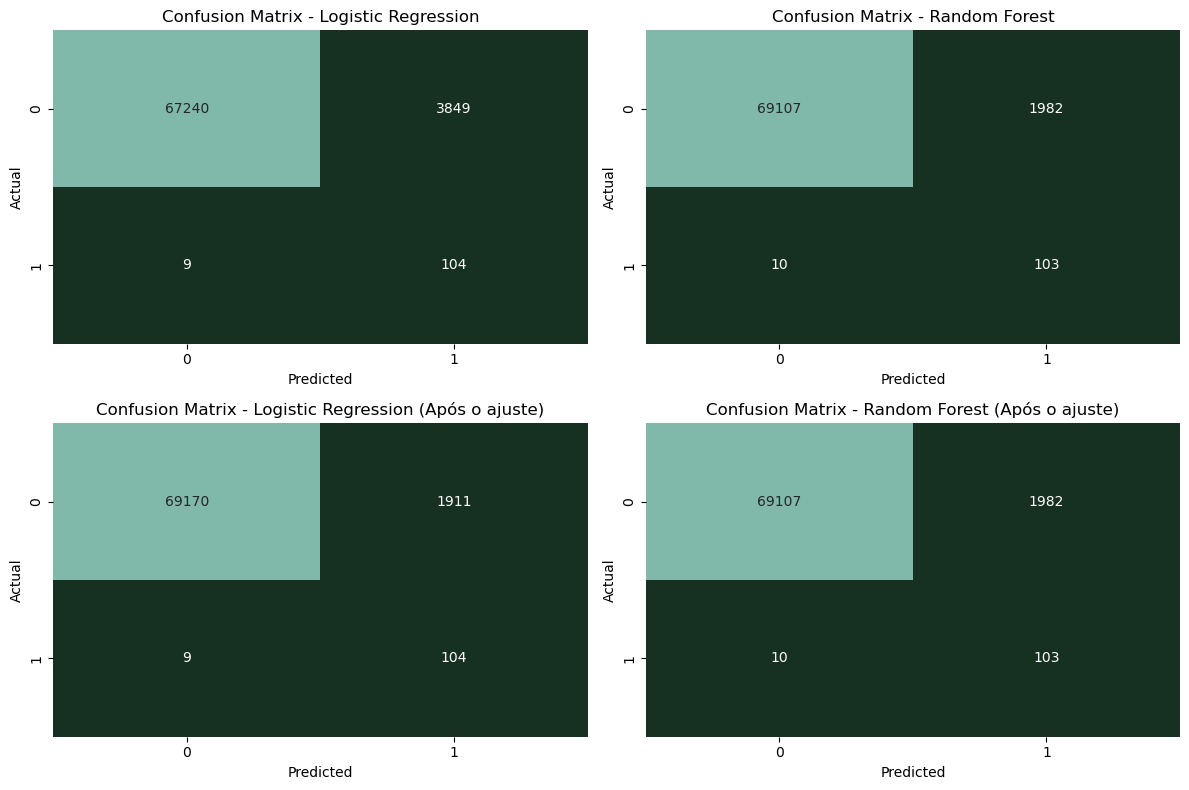

In [48]:
# Criar o subplot com 2 linhas e 2 colunas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Ajuste o figsize conforme necessário

# Definir a cor personalizada
custom_cmap = mcolors.ListedColormap(['#163021', '#aca79a', '#80b8aa'])  # Cores ajustadas para um efeito suave

# Gráfico da matriz de confusão para Logistic Regression
sns.heatmap(confusion_matrix_LR1, annot=True, fmt="d", cmap=custom_cmap, cbar=False, ax=axes[0, 0])
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("Actual")
axes[0, 0].set_title("Confusion Matrix - Logistic Regression")

# Gráfico da matriz de confusão para Random Forest
sns.heatmap(confusion_matrix_RF1, annot=True, fmt="d", cmap=custom_cmap, cbar=False, ax=axes[0, 1])
axes[0, 1].set_xlabel("Predicted")
axes[0, 1].set_ylabel("Actual")
axes[0, 1].set_title("Confusion Matrix - Random Forest")

# Gráfico da matriz de confusão para Logistic Regression
sns.heatmap(confusion_matrix_LR2, annot=True, fmt="d", cmap=custom_cmap, cbar=False, ax=axes[1, 0])
axes[1, 0].set_xlabel("Predicted")
axes[1, 0].set_ylabel("Actual")
axes[1, 0].set_title("Confusion Matrix - Logistic Regression (Após o ajuste)")

# Gráfico da matriz de confusão para Random Forest
sns.heatmap(confusion_matrix_RF2, annot=True, fmt="d", cmap=custom_cmap, cbar=False, ax=axes[1, 1])
axes[1, 1].set_xlabel("Predicted")
axes[1, 1].set_ylabel("Actual")
axes[1, 1].set_title("Confusion Matrix - Random Forest (Após o ajuste)")

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()


In [49]:
# Extrair os valores de x e y
x = np.array(df_resultados.loc['Logistic Regression', 'Parametros_curva'][0])
y = np.array(df_resultados.loc['Logistic Regression', 'Parametros_curva'][1])

# Ordenar x e reorganizar y com base na ordem de x
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
y_sorted = y[sorted_indices]

# Calcular a AUC
auc = metrics.auc(x_sorted, y_sorted)
print(f"AUC: {auc}")

AUC: 0.7216791068961612


<font color = "blue"> **Comentários:**</font>


In [50]:
# 
df_ajustado = df.copy()


# Explorando as Diferentes Técnicas de Balancemento dos Dados

<font color = "blue"> **Comentários:**</font> 
<div style="text-align: justify;">
Conforme descrito na seção anterior, foi possível identificar, de forma inicial, que os modelos Random Forest e Logistic Regression apresentaram os melhores resultados para a classificação. Assim, esses dois modelos serão utilizados nas seções seguintes, com o objetivo de analisar as técnicas aplicadas e aprimorar ainda mais os resultados.

- Aplicando diferentes técnicas de balanceamento dos dados

- Essa seção tem como objetivo analisar cada técnica de balanceamento de dados e selecionar aquela que, com base nas métricas de avaliação consideradas, apresentar o melhor resultado. Posteriormente, essa técnica será utilizada na próxima seção.
    
<div/>

## Questão do Balanceamento da Variável Alvo

Aumentanddo os registros da classe minoritária:

- Duplicando os valores de maneira aleatória
- Precisamos garantir que não vamos ter overfittiong por mostrar ao modelo várias vezes os mesmos daods.

In [51]:
# Instanciando:
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)

In [52]:
X = df_ajustado.drop(columns='Class', axis=1)
y = df_ajustado.Class

In [53]:
# Aplicando para X e y:
X_res_ros, y_res_ros = ros.fit_resample(X, y)
X_res_rus, y_res_rus = rus.fit_resample(X, y)

<AxesSubplot:ylabel='Class'>

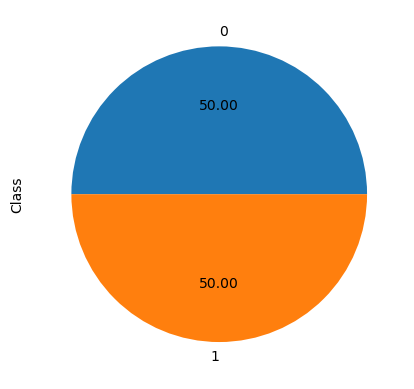

In [54]:
# Visualizando o resultao graficamente
y_res_ros.value_counts().plot.pie(autopct='%.2f')

<AxesSubplot:ylabel='Class'>

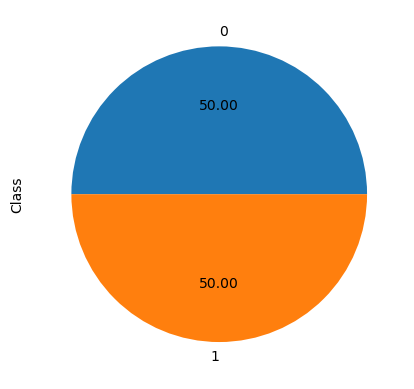

In [55]:
# Visualizando o resultao graficamente
y_res_rus.value_counts().plot.pie(autopct='%.2f')

In [56]:
# Visualizando a quantidade 
y_res_ros.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [57]:
# Visualizando a quantidade 
y_res_rus.value_counts()

0    492
1    492
Name: Class, dtype: int64

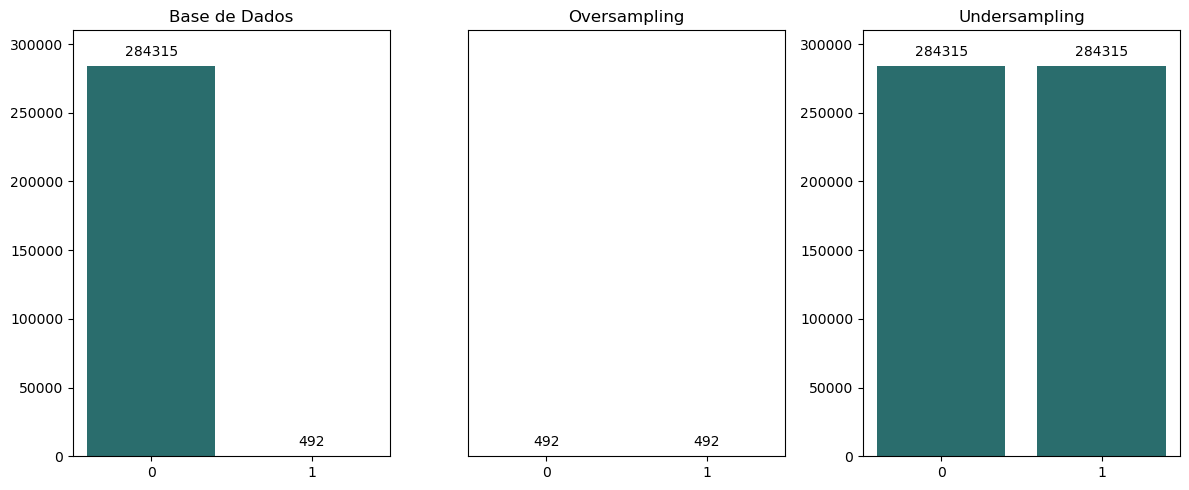

In [58]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 5))

# Gráfico 1
bars1 = ax[0].bar(y.value_counts().index, y.value_counts().values, color='#2a6d6d')
for bar in bars1:
    ax[0].annotate(f'{bar.get_height()}', 
                   xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   xytext=(0, 5),  # Offset para o texto
                   textcoords="offset points",
                   ha='center', va='bottom')

# Gráfico 2
bars2 = ax[1].bar(y_res_rus.value_counts().index, y_res_rus.value_counts().values, color='#2a6d6d')
for bar in bars2:
    ax[1].annotate(f'{bar.get_height()}', 
                   xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   xytext=(0, 5),
                   textcoords="offset points",
                   ha='center', va='bottom')

# Gráfico 3
bars3 = ax[2].bar(y_res_ros.value_counts().index, y_res_ros.value_counts().values, color='#2a6d6d')
for bar in bars3:
    ax[2].annotate(f'{bar.get_height()}', 
                   xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   xytext=(0, 5),
                   textcoords="offset points",
                   ha='center', va='bottom')

# Configurações dos gráficos
ax[0].set(xticks=[0, 1], ylim=(0, 310000))
ax[0].set_title('Base de Dados')

ax[1].set(xticks=[0, 1], ylim=(0, 310000), yticks=[])
ax[1].set_title('Oversampling')

ax[2].set(xticks=[0, 1], ylim=(0, 310000))
ax[2].set_title('Undersampling')

plt.tight_layout()
plt.show()


### Sobre a Suavização dos Dados

In [60]:
# Contando a quantidade de valores:
y_res_ros.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [61]:
# Sendo a base da Class = 1:
df[df['Class'] == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,0.002350,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.000000,1
623,0.002732,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,0.020591,1
4920,0.025823,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.009339,1
6108,0.040430,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,0.002297,1
6329,0.043515,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,0.000039,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,0.978876,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,0.015180,1
280143,0.980063,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.000030,1
280149,0.980086,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,0.003032,1
281144,0.983645,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.009536,1


In [65]:
# Verificando quantas vezes a primeira linha foi duplicada
#X_res[X_res['Time'] == '406.0']
X_res_ros[(X_res_ros.Time == df.iloc[623,0]) & (X_res_ros.V1 == df.iloc[623,1]) ]
#df.iloc[541, 0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
623,0.002732,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,0.020591
284894,0.002732,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,0.020591
285082,0.002732,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,0.020591
285163,0.002732,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,0.020591
286537,0.002732,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,0.020591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567540,0.002732,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,0.020591
567564,0.002732,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,0.020591
567802,0.002732,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,0.020591
568038,0.002732,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,0.020591


In [67]:
for i in range(623, 50000):
    if (len(X_res_ros[X_res_ros['Time'] == df.iloc[i, 0]]) > 300):
        print(i,len(X_res_ros[X_res_ros['Time'] == df.iloc[i, 0]]))

623 595
624 595
4918 558
4919 558
4920 558
6107 583
6108 583
6329 564
6331 560
6333 566
6334 566
6336 591
6338 566
6339 566
6426 617
6427 617
6446 573
6447 573
6472 571
6473 571
6529 606
6609 572
6610 572
6641 578
6642 578
6717 612
6719 566
6734 606
6774 608
6820 553
6870 622
6882 600
6898 607
6899 607
6900 607
6903 542
6904 542
6971 583
8294 596
8295 596
8296 596
8312 591
8313 591
8334 623
8335 623
8615 589
8617 594
8842 555
8845 554
8972 545
8973 545
9034 526
9035 526
9179 582
9251 572
9252 572
9487 603
9509 576
10204 553
10483 570
10484 570
10497 553
10498 560
10568 577
10630 602
10690 547
10800 600
10801 600
10890 604
10891 604
10897 549
11342 565
11343 565
11710 534
11841 592
11880 566
12070 563
12108 554
12260 560
12261 560
12369 585
14104 580
14170 650
14197 556
14211 576
14212 576
14338 568
15166 578
15167 578
15202 590
15203 590
15204 590
15225 557
15449 616
15450 616
15451 616
15476 579
15506 548
15539 579
15540 579
15566 591
15567 591
15568 591
15736 567
15737 567
15751 560


Como a repetição dos dados pode ser um problema, podemos utilizar o parâmtro shrinkage

- Quando o parâmetro for passado, ele vai gerar uma "suavização" nos dados

In [68]:
ros = RandomOverSampler(random_state=42, shrinkage=0.003)

In [69]:
X_res, y_res = ros.fit_resample(X, y)

In [70]:
y_res.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [71]:
X_res[(X_res.Time == df.iloc[623,0]) & (X_res.V1 == df.iloc[623,1]) ]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
623,0.002732,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,0.020591


In [72]:
df.sort_values('Time', ascending=True)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.000030,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.000965,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0.000389,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.002642,0


In [73]:
# Visualizando todos os valores do X_res
X_res.sort_values('Time', ascending=True)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.000030
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.000965
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0.000389
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.002642


In [74]:
for i in range(623, 50000):
    if (len(X_res[X_res['Time'] == df.iloc[i, 0]]) > 300):
        print(i,len(X_res[X_res['Time'] == df.iloc[i, 0]]))

In [75]:

for i in range(623, 50000):
    if (len(X_res[X_res['Time'] == df.iloc[i, 0]]) > 200):
        print(i,len(X_res[X_res['Time'] == df.iloc[i, 0]]))


In [76]:
for i in range(623, 50000):
    if (len(X_res[X_res['Time'] == df.iloc[i, 0]]) > 100):
        print(i,len(X_res[X_res['Time'] == df.iloc[i, 0]]))

In [77]:
for i in range(623, 50000):
    if (len(X_res[X_res['Time'] == df.iloc[i, 0]]) > 10):
        print(i,len(X_res[X_res['Time'] == df.iloc[i, 0]]))

4140 15
4141 15
4142 15
4143 15
4144 15
4145 15
4146 15
4147 15
4148 15
4149 15
4150 15
4151 15
4152 15
4153 15
4154 15
4155 14
4156 14
4157 14
4158 14
4159 14
4160 14
4161 14
4162 14
4163 14
4164 14
4165 14
4166 14
4167 14
4168 14
4169 17
4170 17
4171 17
4172 17
4173 17
4174 17
4175 17
4176 17
4177 17
4178 17
4179 17
4180 17
4181 17
4182 17
4183 17
4184 17
4185 17
4186 19
4187 19
4188 19
4189 19
4190 19
4191 19
4192 19
4193 19
4194 19
4195 19
4196 19
4197 19
4198 19
4199 19
4200 19
4201 19
4202 19
4203 19
4204 19
4215 13
4216 13
4217 13
4218 13
4219 13
4220 13
4221 13
4222 13
4223 13
4224 13
4225 13
4226 13
4227 13
4238 15
4239 15
4240 15
4241 15
4242 15
4243 15
4244 15
4245 15
4246 15
4247 15
4248 15
4249 15
4250 15
4251 15
4252 15
4253 16
4254 16
4255 16
4256 16
4257 16
4258 16
4259 16
4260 16
4261 16
4262 16
4263 16
4264 16
4265 16
4266 16
4267 16
4268 16
4269 15
4270 15
4271 15
4272 15
4273 15
4274 15
4275 15
4276 15
4277 15
4278 15
4279 15
4280 15
4281 15
4282 15
4283 15
4284 13


In [78]:
for i in range(623, 50000):
    if (len(X_res[X_res['Time'] == df.iloc[i, 0]]) > 3):
        print(i,len(X_res[X_res['Time'] == df.iloc[i, 0]]))

623 4
624 4
637 4
638 4
639 4
640 4
669 4
670 4
671 4
672 4
678 4
679 4
680 4
681 4
700 4
701 4
702 4
703 4
728 5
729 5
730 5
731 5
732 5
745 5
746 5
747 5
748 5
749 5
763 4
764 4
765 4
766 4
792 4
793 4
794 4
795 4
833 4
834 4
835 4
836 4
845 4
846 4
847 4
848 4
860 4
861 4
862 4
863 4
865 4
866 4
867 4
868 4
878 5
879 5
880 5
881 5
882 5
889 4
890 4
891 4
892 4
980 4
981 4
982 4
983 4
1003 4
1004 4
1005 4
1006 4
1035 4
1036 4
1037 4
1038 4
1119 5
1120 5
1121 5
1122 5
1123 5
1134 4
1135 4
1136 4
1137 4
1177 5
1178 5
1179 5
1180 5
1181 5
1258 5
1259 5
1260 5
1261 5
1262 5
1268 4
1269 4
1270 4
1271 4
1330 4
1331 4
1332 4
1333 4
1339 4
1340 4
1341 4
1342 4
1347 4
1348 4
1349 4
1350 4
1381 5
1382 5
1383 5
1384 5
1385 5
1481 4
1482 4
1483 4
1484 4
1487 5
1488 5
1489 5
1490 5
1491 5
1565 4
1566 4
1567 4
1568 4
1609 5
1610 5
1611 5
1612 5
1613 5
1636 5
1637 5
1638 5
1639 5
1640 5
1645 4
1646 4
1647 4
1648 4
1651 4
1652 4
1653 4
1654 4
1683 4
1684 4
1685 4
1686 4
1687 4
1688 4
1689 4
1690 4
1

8194 4
8195 4
8196 4
8200 5
8201 5
8202 5
8203 5
8204 5
8205 5
8206 5
8207 5
8208 5
8209 5
8210 6
8211 6
8212 6
8213 6
8214 6
8215 6
8222 5
8223 5
8224 5
8225 5
8226 5
8230 5
8231 5
8232 5
8233 5
8234 5
8244 5
8245 5
8246 5
8247 5
8248 5
8249 5
8250 5
8251 5
8252 5
8253 5
8256 4
8257 4
8258 4
8259 4
8260 4
8261 4
8262 4
8263 4
8266 5
8267 5
8268 5
8269 5
8270 5
8280 5
8281 5
8282 5
8283 5
8284 5
8340 4
8341 4
8342 4
8343 4
8455 5
8456 5
8457 5
8458 5
8459 5
8462 5
8463 5
8464 5
8465 5
8466 5
8505 4
8506 4
8507 4
8508 4
8527 4
8528 4
8529 4
8530 4
8771 4
8772 4
8773 4
8774 4
9026 4
9027 4
9028 4
9029 4
9600 4
9601 4
9602 4
9603 4
9611 4
9612 4
9613 4
9614 4
9615 5
9616 5
9617 5
9618 5
9619 5
9627 4
9628 4
9629 4
9630 4
9631 6
9632 6
9633 6
9634 6
9635 6
9636 6
9644 4
9645 4
9646 4
9647 4
9648 5
9649 5
9650 5
9651 5
9652 5
9653 5
9654 5
9655 5
9656 5
9657 5
9668 8
9669 8
9670 8
9671 8
9672 8
9673 8
9674 8
9675 8
9677 4
9678 4
9679 4
9680 4
9689 5
9690 5
9691 5
9692 5
9693 5
9695 6
9696 6

18581 5
18582 5
18583 5
18607 4
18608 4
18609 4
18610 4
18635 4
18636 4
18637 4
18638 4
18652 4
18653 4
18654 4
18655 4
18657 4
18658 4
18659 4
18660 4
18675 4
18676 4
18677 4
18678 4
18795 4
18796 4
18797 4
18798 4
18832 4
18833 4
18834 4
18835 4
18878 4
18879 4
18880 4
18881 4
18886 4
18887 4
18888 4
18889 4
18995 4
18996 4
18997 4
18998 4
19037 4
19038 4
19039 4
19040 4
19049 5
19050 5
19051 5
19052 5
19053 5
19057 5
19058 5
19059 5
19060 5
19061 5
19065 5
19066 5
19067 5
19068 5
19069 5
19079 4
19080 4
19081 4
19082 4
19107 4
19108 4
19109 4
19110 4
19127 4
19128 4
19129 4
19130 4
19140 4
19141 4
19142 4
19143 4
19161 4
19162 4
19163 4
19164 4
19210 4
19211 4
19212 4
19213 4
19239 5
19240 5
19241 5
19242 5
19243 5
19249 4
19250 4
19251 4
19252 4
19255 4
19256 4
19257 4
19258 4
19269 4
19270 4
19271 4
19272 4
19273 4
19274 4
19275 4
19276 4
19283 4
19284 4
19285 4
19286 4
19355 4
19356 4
19357 4
19358 4
19379 4
19380 4
19381 4
19382 4
19387 4
19388 4
19389 4
19390 4
19475 4
19476 4


23769 4
23770 4
23771 4
23772 4
23795 6
23796 6
23797 6
23798 6
23799 6
23800 6
23814 5
23815 5
23816 5
23817 5
23818 5
23822 4
23823 4
23824 4
23825 4
23854 4
23855 4
23856 4
23857 4
23872 4
23873 4
23874 4
23875 4
23889 6
23890 6
23891 6
23892 6
23893 6
23894 6
23895 5
23896 5
23897 5
23898 5
23899 5
23901 4
23902 4
23903 4
23904 4
23921 4
23922 4
23923 4
23924 4
23925 4
23926 4
23927 4
23928 4
23929 4
23930 4
23931 4
23932 4
23941 4
23942 4
23943 4
23944 4
23945 4
23946 4
23947 4
23948 4
23949 4
23950 4
23951 4
23952 4
23953 5
23954 5
23955 5
23956 5
23957 5
23962 4
23963 4
23964 4
23965 4
23966 4
23967 4
23968 4
23969 4
23990 4
23991 4
23992 4
23993 4
23996 5
23997 5
23998 5
23999 5
24000 5
24001 4
24002 4
24003 4
24004 4
24079 4
24080 4
24081 4
24082 4
24087 4
24088 4
24089 4
24090 4
24099 5
24100 5
24101 5
24102 5
24103 5
24104 5
24105 5
24106 5
24107 5
24108 5
24119 6
24120 6
24121 6
24122 6
24123 6
24124 6
24125 4
24126 4
24127 4
24128 4
24131 5
24132 5
24133 5
24134 5
24135 5


26142 4
26143 4
26144 4
26145 4
26147 5
26148 5
26149 5
26150 5
26151 5
26162 5
26163 5
26164 5
26165 5
26166 5
26169 4
26170 4
26171 4
26172 4
26183 4
26184 4
26185 4
26186 4
26189 4
26190 4
26191 4
26192 4
26196 4
26197 4
26198 4
26199 4
26221 6
26222 6
26223 6
26224 6
26225 6
26226 6
26237 7
26238 7
26239 7
26240 7
26241 7
26242 7
26243 7
26246 6
26247 6
26248 6
26249 6
26250 6
26251 6
26277 4
26278 4
26279 4
26280 4
26286 4
26287 4
26288 4
26289 4
26334 6
26335 6
26336 6
26337 6
26338 6
26339 6
26344 4
26345 4
26346 4
26347 4
26362 4
26363 4
26364 4
26365 4
26372 4
26373 4
26374 4
26375 4
26411 5
26412 5
26413 5
26414 5
26415 5
26416 4
26417 4
26418 4
26419 4
26431 4
26432 4
26433 4
26434 4
26474 4
26475 4
26476 4
26477 4
26492 5
26493 5
26494 5
26495 5
26496 5
26507 4
26508 4
26509 4
26510 4
26528 4
26529 4
26530 4
26531 4
26549 4
26550 4
26551 4
26552 4
26558 4
26559 4
26560 4
26561 4
26571 4
26572 4
26573 4
26574 4
26592 4
26593 4
26594 4
26595 4
26608 4
26609 4
26610 4
26611 4


29029 5
29030 5
29031 5
29032 5
29033 5
29058 5
29059 5
29060 5
29061 5
29062 5
29066 4
29067 4
29068 4
29069 4
29070 5
29071 5
29072 5
29073 5
29074 5
29082 6
29083 6
29084 6
29085 6
29086 6
29087 6
29113 6
29114 6
29115 6
29116 6
29117 6
29118 6
29127 4
29128 4
29129 4
29130 4
29131 4
29132 4
29133 4
29134 4
29145 4
29146 4
29147 4
29148 4
29149 4
29150 4
29151 4
29152 4
29158 4
29159 4
29160 4
29161 4
29175 5
29176 5
29177 5
29178 5
29179 5
29185 5
29186 5
29187 5
29188 5
29189 5
29190 4
29191 4
29192 4
29193 4
29196 6
29197 6
29198 6
29199 6
29200 6
29201 6
29211 4
29212 4
29213 4
29214 4
29219 4
29220 4
29221 4
29222 4
29231 7
29232 7
29233 7
29234 7
29235 7
29236 7
29237 7
29238 5
29239 5
29240 5
29241 5
29242 5
29249 4
29250 4
29251 4
29252 4
29253 4
29254 4
29255 4
29256 4
29263 4
29264 4
29265 4
29266 4
29284 6
29285 6
29286 6
29287 6
29288 6
29289 6
29312 4
29313 4
29314 4
29315 4
29323 6
29324 6
29325 6
29326 6
29327 6
29328 6
29339 5
29340 5
29341 5
29342 5
29343 5
29350 4


31637 6
31638 6
31639 6
31640 6
31641 6
31650 4
31651 4
31652 4
31653 4
31654 4
31655 4
31656 4
31657 4
31669 4
31670 4
31671 4
31672 4
31680 4
31681 4
31682 4
31683 4
31698 4
31699 4
31700 4
31701 4
31704 4
31705 4
31706 4
31707 4
31730 4
31731 4
31732 4
31733 4
31736 4
31737 4
31738 4
31739 4
31752 4
31753 4
31754 4
31755 4
31756 5
31757 5
31758 5
31759 5
31760 5
31769 4
31770 4
31771 4
31772 4
31780 4
31781 4
31782 4
31783 4
31785 4
31786 4
31787 4
31788 4
31800 5
31801 5
31802 5
31803 5
31804 5
31813 4
31814 4
31815 4
31816 4
31819 5
31820 5
31821 5
31822 5
31823 5
31824 6
31825 6
31826 6
31827 6
31828 6
31829 6
31834 4
31835 4
31836 4
31837 4
31847 6
31848 6
31849 6
31850 6
31851 6
31852 6
31853 7
31854 7
31855 7
31856 7
31857 7
31858 7
31859 7
31860 4
31861 4
31862 4
31863 4
31867 4
31868 4
31869 4
31870 4
31871 5
31872 5
31873 5
31874 5
31875 5
31886 7
31887 7
31888 7
31889 7
31890 7
31891 7
31892 7
31894 4
31895 4
31896 4
31897 4
31898 4
31899 4
31900 4
31901 4
31902 4
31903 4


34309 4
34310 4
34311 4
34322 5
34323 5
34324 5
34325 5
34326 5
34330 6
34331 6
34332 6
34333 6
34334 6
34335 6
34347 4
34348 4
34349 4
34350 4
34364 4
34365 4
34366 4
34367 4
34379 5
34380 5
34381 5
34382 5
34383 5
34388 5
34389 5
34390 5
34391 5
34392 5
34393 5
34394 5
34395 5
34396 5
34397 5
34400 4
34401 4
34402 4
34403 4
34404 4
34405 4
34406 4
34407 4
34408 4
34409 4
34410 4
34411 4
34419 4
34420 4
34421 4
34422 4
34423 4
34424 4
34425 4
34426 4
34441 5
34442 5
34443 5
34444 5
34445 5
34460 4
34461 4
34462 4
34463 4
34468 4
34469 4
34470 4
34471 4
34475 4
34476 4
34477 4
34478 4
34483 5
34484 5
34485 5
34486 5
34487 5
34497 4
34498 4
34499 4
34500 4
34517 4
34518 4
34519 4
34520 4
34526 4
34527 4
34528 4
34529 4
34541 5
34542 5
34543 5
34544 5
34545 5
34546 4
34547 4
34548 4
34549 4
34608 6
34609 6
34610 6
34611 6
34612 6
34613 6
34623 7
34624 7
34625 7
34626 7
34627 7
34628 7
34629 7
34635 4
34636 4
34637 4
34638 4
34639 4
34640 4
34641 4
34642 4
34654 4
34655 4
34656 4
34657 4


37142 4
37143 4
37152 5
37153 5
37154 5
37155 5
37156 5
37163 5
37164 5
37165 5
37166 5
37167 5
37168 4
37169 4
37170 4
37171 4
37186 4
37187 4
37188 4
37189 4
37192 5
37193 5
37194 5
37195 5
37196 5
37218 5
37219 5
37220 5
37221 5
37222 5
37231 4
37232 4
37233 4
37234 4
37244 4
37245 4
37246 4
37247 4
37260 4
37261 4
37262 4
37263 4
37276 6
37277 6
37278 6
37279 6
37280 6
37281 6
37293 4
37294 4
37295 4
37296 4
37297 5
37298 5
37299 5
37300 5
37301 5
37302 6
37303 6
37304 6
37305 6
37306 6
37307 6
37308 4
37309 4
37310 4
37311 4
37318 4
37319 4
37320 4
37321 4
37332 4
37333 4
37334 4
37335 4
37336 4
37337 4
37338 4
37339 4
37340 6
37341 6
37342 6
37343 6
37344 6
37345 6
37350 4
37351 4
37352 4
37353 4
37363 6
37364 6
37365 6
37366 6
37367 6
37368 6
37390 4
37391 4
37392 4
37393 4
37403 4
37404 4
37405 4
37406 4
37407 4
37408 4
37409 4
37410 4
37413 5
37414 5
37415 5
37416 5
37417 5
37420 6
37421 6
37422 6
37423 6
37424 6
37425 6
37429 4
37430 4
37431 4
37432 4
37439 5
37440 5
37441 5


39598 17
39599 17
39600 17
39601 17
39602 17
39603 6
39604 6
39605 6
39606 6
39607 6
39608 6
39609 6
39610 6
39611 6
39612 6
39613 6
39614 6
39618 6
39619 6
39620 6
39621 6
39622 6
39623 6
39624 4
39625 4
39626 4
39627 4
39630 4
39631 4
39632 4
39633 4
39640 5
39641 5
39642 5
39643 5
39644 5
39645 4
39646 4
39647 4
39648 4
39652 4
39653 4
39654 4
39655 4
39659 5
39660 5
39661 5
39662 5
39663 5
39664 4
39665 4
39666 4
39667 4
39672 5
39673 5
39674 5
39675 5
39676 5
39677 4
39678 4
39679 4
39680 4
39688 5
39689 5
39690 5
39691 5
39692 5
39695 4
39696 4
39697 4
39698 4
39717 5
39718 5
39719 5
39720 5
39721 5
39722 4
39723 4
39724 4
39725 4
39729 5
39730 5
39731 5
39732 5
39733 5
39746 6
39747 6
39748 6
39749 6
39750 6
39751 6
39761 4
39762 4
39763 4
39764 4
39808 5
39809 5
39810 5
39811 5
39812 5
39817 4
39818 4
39819 4
39820 4
39830 5
39831 5
39832 5
39833 5
39834 5
39843 7
39844 7
39845 7
39846 7
39847 7
39848 7
39849 7
39850 6
39851 6
39852 6
39853 6
39854 6
39855 6
39859 6
39860 6
398

42121 6
42122 6
42126 5
42127 5
42128 5
42129 5
42130 5
42131 5
42132 5
42133 5
42134 5
42135 5
42139 5
42140 5
42141 5
42142 5
42143 5
42149 4
42150 4
42151 4
42152 4
42153 6
42154 6
42155 6
42156 6
42157 6
42158 6
42165 5
42166 5
42167 5
42168 5
42169 5
42182 4
42183 4
42184 4
42185 4
42197 7
42198 7
42199 7
42200 7
42201 7
42202 7
42203 7
42209 4
42210 4
42211 4
42212 4
42233 4
42234 4
42235 4
42236 4
42240 5
42241 5
42242 5
42243 5
42244 5
42245 5
42246 5
42247 5
42248 5
42249 5
42255 4
42256 4
42257 4
42258 4
42259 4
42260 4
42261 4
42262 4
42267 7
42268 7
42269 7
42270 7
42271 7
42272 7
42273 7
42274 5
42275 5
42276 5
42277 5
42278 5
42282 4
42283 4
42284 4
42285 4
42316 6
42317 6
42318 6
42319 6
42320 6
42321 6
42329 4
42330 4
42331 4
42332 4
42337 6
42338 6
42339 6
42340 6
42341 6
42342 6
42375 4
42376 4
42377 4
42378 4
42382 5
42383 5
42384 5
42385 5
42386 5
42416 6
42417 6
42418 6
42419 6
42420 6
42421 6
42424 4
42425 4
42426 4
42427 4
42428 5
42429 5
42430 5
42431 5
42432 5


44623 4
44624 4
44625 4
44626 4
44629 5
44630 5
44631 5
44632 5
44633 5
44647 4
44648 4
44649 4
44650 4
44657 5
44658 5
44659 5
44660 5
44661 5
44662 4
44663 4
44664 4
44665 4
44666 5
44667 5
44668 5
44669 5
44670 5
44679 4
44680 4
44681 4
44682 4
44690 4
44691 4
44692 4
44693 4
44696 6
44697 6
44698 6
44699 6
44700 6
44701 6
44702 4
44703 4
44704 4
44705 4
44711 4
44712 4
44713 4
44714 4
44715 5
44716 5
44717 5
44718 5
44719 5
44725 5
44726 5
44727 5
44728 5
44729 5
44730 5
44731 5
44732 5
44733 5
44734 5
44742 5
44743 5
44744 5
44745 5
44746 5
44755 6
44756 6
44757 6
44758 6
44759 6
44760 6
44765 5
44766 5
44767 5
44768 5
44769 5
44770 4
44771 4
44772 4
44773 4
44774 5
44775 5
44776 5
44777 5
44778 5
44782 4
44783 4
44784 4
44785 4
44797 5
44798 5
44799 5
44800 5
44801 5
44806 5
44807 5
44808 5
44809 5
44810 5
44831 4
44832 4
44833 4
44834 4
44851 5
44852 5
44853 5
44854 5
44855 5
44879 4
44880 4
44881 4
44882 4
44883 4
44884 4
44885 4
44886 4
44887 6
44888 6
44889 6
44890 6
44891 6


47098 5
47099 5
47100 5
47101 5
47102 5
47105 4
47106 4
47107 4
47108 4
47117 6
47118 6
47119 6
47120 6
47121 6
47122 6
47131 5
47132 5
47133 5
47134 5
47135 5
47138 4
47139 4
47140 4
47141 4
47142 4
47143 4
47144 4
47145 4
47154 4
47155 4
47156 4
47157 4
47158 4
47159 4
47160 4
47161 4
47172 4
47173 4
47174 4
47175 4
47183 4
47184 4
47185 4
47186 4
47188 4
47189 4
47190 4
47191 4
47200 4
47201 4
47202 4
47203 4
47211 6
47212 6
47213 6
47214 6
47215 6
47216 6
47217 6
47218 6
47219 6
47220 6
47221 6
47222 6
47229 5
47230 5
47231 5
47232 5
47233 5
47243 5
47244 5
47245 5
47246 5
47247 5
47257 13
47258 13
47259 13
47260 13
47261 13
47262 13
47263 13
47264 13
47265 13
47266 13
47267 13
47268 13
47269 13
47275 4
47276 4
47277 4
47278 4
47282 4
47283 4
47284 4
47285 4
47288 4
47289 4
47290 4
47291 4
47295 4
47296 4
47297 4
47298 4
47305 6
47306 6
47307 6
47308 6
47309 6
47310 6
47311 4
47312 4
47313 4
47314 4
47318 6
47319 6
47320 6
47321 6
47322 6
47323 6
47335 4
47336 4
47337 4
47338 4
473

49613 6
49614 6
49618 4
49619 4
49620 4
49621 4
49624 5
49625 5
49626 5
49627 5
49628 5
49629 4
49630 4
49631 4
49632 4
49646 5
49647 5
49648 5
49649 5
49650 5
49652 4
49653 4
49654 4
49655 4
49657 5
49658 5
49659 5
49660 5
49661 5
49664 4
49665 4
49666 4
49667 4
49676 4
49677 4
49678 4
49679 4
49683 4
49684 4
49685 4
49686 4
49689 5
49690 5
49691 5
49692 5
49693 5
49712 4
49713 4
49714 4
49715 4
49716 8
49717 8
49718 8
49719 8
49720 8
49721 8
49722 8
49723 8
49729 5
49730 5
49731 5
49732 5
49733 5
49738 4
49739 4
49740 4
49741 4
49748 4
49749 4
49750 4
49751 4
49758 4
49759 4
49760 4
49761 4
49763 5
49764 5
49765 5
49766 5
49767 5
49775 4
49776 4
49777 4
49778 4
49787 6
49788 6
49789 6
49790 6
49791 6
49792 6
49793 4
49794 4
49795 4
49796 4
49802 4
49803 4
49804 4
49805 4
49807 4
49808 4
49809 4
49810 4
49817 4
49818 4
49819 4
49820 4
49837 4
49838 4
49839 4
49840 4
49844 4
49845 4
49846 4
49847 4
49851 6
49852 6
49853 6
49854 6
49855 6
49856 6
49861 6
49862 6
49863 6
49864 6
49865 6


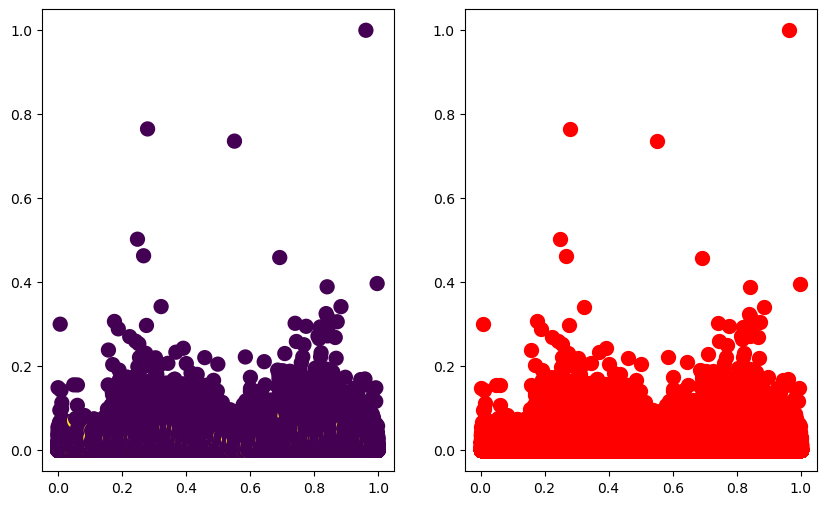

In [79]:
# Visualizando graficamente
fig, ax = plt.subplots(ncols=2,figsize = (10, 6))

ax[0].scatter(df.Time, df.Amount, c = df.Class, linewidths=5)
ax[1].scatter(X_res.Time, X_res.Amount, c = 'red', linewidths=5)

plt.show()

## Modelo Inicial Comparativo

In [80]:
# Separando o dataset em X e y
X = df.drop(columns='Class', axis=1)
y = df.Class

# Separando X e y em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

# Verificando a distribuição das classes (0 e 1) na variável alvo nos 
# dois conjuntos (treino e teste):
percentual_ytrain = y_train.value_counts(normalize=True)*100
print(percentual_ytrain)

percentual_ytest = y_test.value_counts(normalize=True)*100
print(percentual_ytest)

0    99.827251
1     0.172749
Name: Class, dtype: float64
0    99.827252
1     0.172748
Name: Class, dtype: float64


<div style="text-align: justify;">
Verificando então o percentual da classe igual a 1 da variável alvo do conjunto de dados temos inicialmente a proporção da divisão dessa classe igual em ambos os conjuntos de treino e teste, isso ocorre pois foi utilizado o parâmetro stratify. Porém, analisando esse percentual, principamente, no conjunto de dados de teste, é notório que a quantidade de dados da classe 1 é muito baixa, com um alto grau de desbalanceamento dos dados. Logo, é necessário aplica as técnicas de balancemento nos dados, para garantir uma melhor performance dos modelos que serão gerado. Como critério de comparação ou resultado inicial será efetuado um modelo sem a aplicação de alguma técnica de balanceamento.
    
<div/>

In [81]:
start_time = time.time()
# Definindo o classificador com o RandomFlorest
clf_RF = RandomForestClassifier(random_state=42)

# Definindo o classificador com  o LogisticRegression
clf_LR = LogisticRegression(random_state=42)

# Treinando os modelos com os dados de treino (X_train, y_train)
clf_RF = clf_RF.fit(X_train, y_train)
clf_LR = clf_LR.fit(X_train, y_train)

end_time =time.time()
print(f"Tempo de execução: {(end_time - start_time)/60:.4f} min")

Tempo de execução: 2.5596 min


C:\Users\Yago\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
# Testando os modelos / Fazendo uma previsão
y_pred_RF = clf_RF.predict(X_test)
y_pred_LR = clf_LR.predict(X_test)

In [83]:
# Calculando a Acurácia:
accuracy_RF = accuracy_score(y_test, y_pred_RF)*100
accuracy_LR = accuracy_score(y_test, y_pred_LR)*100

print(f'Acurácia RF: {accuracy_RF:.2f} %')
print(f'Acurácia LR: {accuracy_LR:.2f} % \n')

# Precisão:
precision_RF = precision_score(y_test, y_pred_RF)
precision_LR = precision_score(y_test, y_pred_LR)
print(f'precision_RF: {precision_RF}')
print(f'precision_LR: {precision_LR}\n')

# Recall:
recall_RF = recall_score(y_test,y_pred_RF)
recall_LR = recall_score(y_test,y_pred_LR)
print(f'recall_RF: {recall_RF}')
print(f'recall_LR: {recall_LR}\n')

# F1:
F1_RF = metrics.f1_score(y_test, y_pred_RF)
F1_LR = metrics.f1_score(y_test, y_pred_LR)
print(f'F1_RF: {F1_RF}')
print(f'F1_LR: {F1_LR}\n')

# Matriz de confusão:
confusion_matrix_RF = confusion_matrix(y_test, y_pred_RF)
confusion_matrix_LR = confusion_matrix(y_test, y_pred_LR)
print(f'RF:\n {confusion_matrix_RF}\n')
print(f'LR:\n {confusion_matrix_LR}\n')

Acurácia RF: 99.96 %
Acurácia LR: 99.92 % 

precision_RF: 0.9428571428571428
precision_LR: 0.8461538461538461

recall_RF: 0.8048780487804879
recall_LR: 0.6260162601626016

F1_RF: 0.868421052631579
F1_LR: 0.719626168224299

RF:
 [[71073     6]
 [   24    99]]

LR:
 [[71065    14]
 [   46    77]]



In [84]:
data = {
     'Modelo'  :        ['RF_init',              'LR_init'],
     'Acurácia':        [round(accuracy_RF, 2) , round(accuracy_LR,2)],
     'Precisão':        [round(precision_RF, 2), round(precision_LR, 2)],
     'Recall'  :        [round(recall_RF, 2)   , round(recall_LR, 2)],
     'F1'      :        [round(F1_RF, 2), round(F1_LR, 2)],
     'Matriz-confusão': [confusion_matrix_RF, confusion_matrix_LR]
}

In [85]:
df_1= pd.DataFrame(data)

In [86]:
df_1

,Modelo,Acurácia,Precisão,Recall,F1,Matriz-confusão
0,RF_init,99.96,0.94,0.80,0.87,"[[71073, 6], [24, 99]]"
1,LR_init,99.92,0.85,0.63,0.72,"[[71065, 14], [46, 77]]"


<font color = "blue"> **Comentários:**</font> 

Após a geração desses modelos iniciais e suas métricas. A partir dessa tabela resultante será feita uma análise comparativa com base na aplicação das técnicas de balanceamento que serão aplicadas.

## Aplicando as Técnicas de Undersampling

In [88]:
print(X.shape, y.shape)


(284807, 30) (284807,)


In [89]:
# Definindo X e y:
X = df.drop(columns='Class', axis=1)
y = df.Class

# Separando os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

# Definindo o RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)

# Treinando o RandomUnderSampler:
X_train_RU, y_train_RU = rus.fit_resample(X_train, y_train)

In [90]:
# Definindo os modelos:
clf_RF_RU = RandomForestClassifier()
clf_LR_RU = LogisticRegression()

# Treinando os modelos:
clf_RF_RU = clf_RF_RU.fit(X_train_RU, y_train_RU)
clf_LR_RU = clf_LR_RU.fit(X_train_RU, y_train_RU)

# Realizando a previsão dos dados de teste:
y_pred_RF_RU = clf_RF_RU.predict(X_test)
y_pred_LR_RU = clf_LR_RU.predict(X_test)

In [91]:
# Calculando a Acurácia:
accuracy_RF_RU = accuracy_score(y_test, y_pred_RF_RU)*100
accuracy_LR_RU = accuracy_score(y_test, y_pred_LR_RU)*100

print(f'Acurácia RF_RU: {accuracy_RF_RU:.2f} %')
print(f'Acurácia LR_RU: {accuracy_LR_RU:.2f} % \n')

# Precisão:
precision_RF_RU = precision_score(y_test, y_pred_RF_RU)
precision_LR_RU = precision_score(y_test, y_pred_LR_RU)
print(f'precision_RF_RU: {precision_RF_RU}')
print(f'precision_LR_RU: {precision_LR_RU}\n')

# Recall:
recall_RF_RU = recall_score(y_test,y_pred_RF_RU)
recall_LR_RU = recall_score(y_test,y_pred_LR_RU)
print(f'recall_RF_RU: {recall_RF_RU}')
print(f'recall_LR_RU: {recall_LR_RU}\n')

# F1:
F1_RF_RU = metrics.f1_score(y_test, y_pred_RF_RU)
F1_LR_RU = metrics.f1_score(y_test, y_pred_LR_RU)
print(f'F1_RF_RU: {F1_RF_RU}')
print(f'F1_LR_RU: {F1_LR_RU}\n')

# Matriz de confusão:
confusion_matrix_RF_RU = confusion_matrix(y_test, y_pred_RF_RU)
confusion_matrix_LR_RU = confusion_matrix(y_test, y_pred_LR_RU)
print(f'RF_RU:\n {confusion_matrix_RF_RU}\n')
print(f'LR_RU:\n {confusion_matrix_LR_RU}\n')

Acurácia RF_RU: 97.62 %
Acurácia LR_RU: 97.07 % 

precision_RF_RU: 0.06089385474860335
precision_LR_RU: 0.05034324942791762

recall_RF_RU: 0.8861788617886179
recall_LR_RU: 0.8943089430894309

F1_RF_RU: 0.11395713538944068
F1_LR_RU: 0.09532062391681109

RF_RU:
 [[69398  1681]
 [   14   109]]

LR_RU:
 [[69004  2075]
 [   13   110]]



In [92]:
data = {
     'Modelo'  :        ['RF_init',  
                         'RF_RU',
                         'LR_init',
                         'LR_RU'
                        ],
    
     'Acurácia':        [round(accuracy_RF, 4),
                         round(accuracy_RF_RU, 4),
                         round(accuracy_LR, 4),
                         round(accuracy_LR_RU, 4)
                        ],
    
     'Precisão':        [round(precision_RF, 4),
                         round(precision_RF_RU, 4),
                         round(precision_LR, 4),
                         round(precision_LR_RU, 4)
                        ],
    
     'Recall'  :        [round(recall_RF, 4),
                         round(recall_RF_RU, 4),
                         round(recall_LR, 4),
                         round(recall_LR_RU, 4)
                        ],
    
     'F1'      :        [round(F1_RF, 4),
                         round(F1_RF_RU, 4),
                         round(F1_LR, 4),
                         round(F1_LR_RU, 4)
                        ],
    
     'Matriz-confusão': [confusion_matrix_RF,
                         confusion_matrix_RF_RU,
                         confusion_matrix_LR,
                         confusion_matrix_LR_RU
                        ]
}

In [93]:
df_1 = pd.DataFrame(data)

In [94]:
df_1

,Modelo,Acurácia,Precisão,Recall,F1,Matriz-confusão
0,RF_init,99.9579,0.9429,0.8049,0.8684,"[[71073, 6], [24, 99]]"
1,RF_RU,97.6194,0.0609,0.8862,0.1140,"[[69398, 1681], [14, 109]]"
2,LR_init,99.9157,0.8462,0.6260,0.7196,"[[71065, 14], [46, 77]]"
3,LR_RU,97.0675,0.0503,0.8943,0.0953,"[[69004, 2075], [13, 110]]"


### ClusterCentroids

In [95]:
# Definindo
cc = ClusterCentroids(random_state=42)

# Criando a amostra dos dados
X_train_ruCC, y_train_ruCC = cc.fit_resample(X_train, y_train)


In [96]:
# Definindo os modelos:
clf_RF_RU = RandomForestClassifier()
clf_LR_RU = LogisticRegression()

# Treinando os modelos:
clf_RF_RU = clf_RF_RU.fit(X_train_ruCC, y_train_ruCC)
clf_LR_RU = clf_LR_RU.fit(X_train_ruCC, y_train_ruCC)

# Realizando a previsão dos dados de teste:
y_pred_RF_ruCC = clf_RF_RU.predict(X_test)
y_pred_LR_ruCC = clf_LR_RU.predict(X_test)


C:\Users\Yago\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
# Calculando a Acurácia:
accuracy_RF_ruCC = accuracy_score(y_test, y_pred_RF_ruCC)*100
accuracy_LR_ruCC = accuracy_score(y_test, y_pred_LR_ruCC)*100

print(f'Acurácia RF_ruCC: {accuracy_RF_ruCC:.2f} %')
print(f'Acurácia LR_ruCC: {accuracy_LR_ruCC:.2f} % \n')

# Precisão:
precision_RF_ruCC = precision_score(y_test, y_pred_RF_ruCC)
precision_LR_ruCC = precision_score(y_test, y_pred_LR_ruCC)
print(f'precision_RF_ruCC: {precision_RF_ruCC}')
print(f'precision_LR_ruCC: {precision_LR_ruCC}\n')

# Recall:
recall_RF_ruCC = recall_score(y_test,y_pred_RF_ruCC)
recall_LR_ruCC = recall_score(y_test,y_pred_LR_ruCC)
print(f'recall_RF_ruCC: {recall_RF_ruCC}')
print(f'recall_LR_ruCC: {recall_LR_ruCC}\n')

# F1:
F1_RF_ruCC = metrics.f1_score(y_test, y_pred_RF_ruCC)
F1_LR_ruCC = metrics.f1_score(y_test, y_pred_LR_ruCC)
print(f'F1_RF_ruCC: {F1_RF_ruCC}')
print(f'F1_LR_ruCC: {F1_LR_ruCC}\n')

# Matriz de confusão:
confusion_matrix_RF_ruCC = confusion_matrix(y_test, y_pred_RF_ruCC)
confusion_matrix_LR_ruCC = confusion_matrix(y_test, y_pred_LR_ruCC)
print(f'RF_ruCC:\n {confusion_matrix_RF_ruCC}\n')
print(f'LR_ruCC:\n {confusion_matrix_LR_ruCC}\n')

Acurácia RF_ruCC: 71.16 %
Acurácia LR_ruCC: 95.79 % 

precision_RF_ruCC: 0.005619066072466576
precision_LR_ruCC: 0.03433754454162617

recall_RF_ruCC: 0.943089430894309
recall_LR_ruCC: 0.8617886178861789

F1_RF_ruCC: 0.011171570279770789
F1_LR_ruCC: 0.0660436137071651

RF_ruCC:
 [[50551 20528]
 [    7   116]]

LR_ruCC:
 [[68098  2981]
 [   17   106]]



In [98]:
data = {
     'Modelo'  :        ['RF_init',  
                         'RF_RU',
                         'RF_RU_CC',
                         'LR_init',
                         'LR_RU',
                         'LR_RU_CC'
                        ],
    
     'Acurácia':        [round(accuracy_RF, 4),
                         round(accuracy_RF_RU, 4),
                         round(accuracy_RF_ruCC, 4),
                         round(accuracy_LR, 4),
                         round(accuracy_LR_RU, 4),
                         round(accuracy_LR_ruCC, 4)
                        ],
    
     'Precisão':        [round(precision_RF, 4),
                         round(precision_RF_RU, 4),
                         round(precision_RF_ruCC, 4),
                         round(precision_LR, 4),
                         round(precision_LR_RU, 4),
                         round(precision_LR_ruCC, 4)
                        ],
    
     'Recall'  :        [round(recall_RF, 4),
                         round(recall_RF_RU, 4),
                         round(recall_RF_ruCC, 4),
                         round(recall_LR, 4),
                         round(recall_LR_RU, 4),
                         round(recall_LR_ruCC, 4)
                        ],
    
     'F1'      :        [round(F1_RF, 4),
                         round(F1_RF_RU, 4),
                         round(F1_RF_ruCC, 4),
                         round(F1_LR, 4),
                         round(F1_LR_RU, 4),
                         round(F1_LR_ruCC, 4)
                        ],
    
     'Matriz-confusão': [confusion_matrix_RF,
                         confusion_matrix_RF_RU,
                         confusion_matrix_RF_ruCC,
                         confusion_matrix_LR,
                         confusion_matrix_LR_RU,
                         confusion_matrix_LR_ruCC
                        ]
}

In [99]:
df_1 = pd.DataFrame(data)

In [100]:
df_1

,Modelo,Acurácia,Precisão,Recall,F1,Matriz-confusão
0,RF_init,99.9579,0.9429,0.8049,0.8684,"[[71073, 6], [24, 99]]"
1,RF_RU,97.6194,0.0609,0.8862,0.1140,"[[69398, 1681], [14, 109]]"
2,RF_RU_CC,71.1595,0.0056,0.9431,0.0112,"[[50551, 20528], [7, 116]]"
3,LR_init,99.9157,0.8462,0.6260,0.7196,"[[71065, 14], [46, 77]]"
4,LR_RU,97.0675,0.0503,0.8943,0.0953,"[[69004, 2075], [13, 110]]"
5,LR_RU_CC,95.7894,0.0343,0.8618,0.0660,"[[68098, 2981], [17, 106]]"


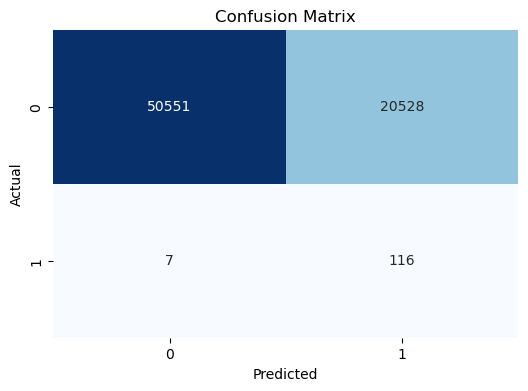

In [101]:
# Criar o gráfico
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_RF_ruCC, annot=True, fmt="d", cmap="Blues", cbar=False)

# Adicionar labels e título
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### NearMiss

In [102]:
# Definindo
nm = NearMiss()

# Criando a amostra dos dados
X_train_ruNM, y_train_ruNM = nm.fit_resample(X_train, y_train)

In [103]:
# Definindo os modelos:
clf_RF_RU = RandomForestClassifier()
clf_LR_RU = LogisticRegression()

# Treinando os modelos:
clf_RF_RU = clf_RF_RU.fit(X_train_ruNM, y_train_ruNM)
clf_LR_RU = clf_LR_RU.fit(X_train_ruNM, y_train_ruNM)

# Realizando a previsão dos dados de teste:
y_pred_RF_ruNM = clf_RF_RU.predict(X_test)
y_pred_LR_ruNM = clf_LR_RU.predict(X_test)


In [104]:
# Calculando a Acurácia:
accuracy_RF_ruNM = accuracy_score(y_test, y_pred_RF_ruNM)*100
accuracy_LR_ruNM = accuracy_score(y_test, y_pred_LR_ruNM)*100

print(f'Acurácia RF_ruNM: {accuracy_RF_ruNM:.2f} %')
print(f'Acurácia LR_ruNM: {accuracy_LR_ruNM:.2f} % \n')

# Precisão:
precision_RF_ruNM = precision_score(y_test, y_pred_RF_ruNM)
precision_LR_ruNM = precision_score(y_test, y_pred_LR_ruNM)
print(f'precision_RF_ruNM: {precision_RF_ruNM}')
print(f'precision_LR_ruNM: {precision_LR_ruNM}\n')

# Recall:
recall_RF_ruNM = recall_score(y_test,y_pred_RF_ruNM)
recall_LR_ruNM = recall_score(y_test,y_pred_LR_ruNM)
print(f'recall_RF_ruNM: {recall_RF_ruNM}')
print(f'recall_LR_ruNM: {recall_LR_ruNM}\n')

# F1:
F1_RF_ruNM = metrics.f1_score(y_test, y_pred_RF_ruNM)
F1_LR_ruNM = metrics.f1_score(y_test, y_pred_LR_ruNM)
print(f'F1_RF_ruNM: {F1_RF_ruNM}')
print(f'F1_LR_ruNM: {F1_LR_ruNM}\n')

# Matriz de confusão:
confusion_matrix_RF_ruNM = confusion_matrix(y_test, y_pred_RF_ruNM)
confusion_matrix_LR_ruNM = confusion_matrix(y_test, y_pred_LR_ruNM)
print(f'RF_ruNM:\n {confusion_matrix_RF_ruNM}\n')
print(f'LR_ruNM:\n {confusion_matrix_LR_ruNM}\n')

Acurácia RF_ruNM: 4.66 %
Acurácia LR_ruNM: 63.48 % 

precision_RF_ruNM: 0.0017647577869937352
precision_LR_ruNM: 0.004441891633161018

recall_RF_ruNM: 0.975609756097561
recall_LR_ruNM: 0.943089430894309

F1_RF_ruNM: 0.0035231426432377685
F1_LR_ruNM: 0.008842137358030336

RF_ruNM:
 [[ 3201 67878]
 [    3   120]]

LR_ruNM:
 [[45080 25999]
 [    7   116]]



In [105]:
data = {
     'Modelo'  :        ['RF_init',  
                         'RF_RU',
                         'RF_RU_CC',
                         'RF_RU_NM',
                         'LR_init',
                         'LR_RU',
                         'LR_RU_CC',
                         'LR_RU_NM'
                        ],
    
     'Acurácia':        [round(accuracy_RF, 4),
                         round(accuracy_RF_RU, 4),
                         round(accuracy_RF_ruCC, 4),
                         round(accuracy_RF_ruNM, 4),
                         round(accuracy_LR, 4),
                         round(accuracy_LR_RU, 4),
                         round(accuracy_LR_ruCC, 4),
                         round(accuracy_LR_ruNM, 4),
                        ],
    
     'Precisão':        [round(precision_RF, 4),
                         round(precision_RF_RU, 4),
                         round(precision_RF_ruCC, 4),
                         round(precision_RF_ruNM, 4),
                         round(precision_LR, 4),
                         round(precision_LR_RU, 4),
                         round(precision_LR_ruCC, 4),
                         round(precision_LR_ruNM, 4),
                        ],
    
     'Recall'  :        [round(recall_RF, 4),
                         round(recall_RF_RU, 4),
                         round(recall_RF_ruCC, 4),
                         round(recall_RF_ruNM, 4),
                         round(recall_LR, 4),
                         round(recall_LR_RU, 4),
                         round(recall_LR_ruCC, 4),
                         round(recall_LR_ruNM, 4),
                        ],
    
     'F1'      :        [round(F1_RF, 4),
                         round(F1_RF_RU, 4),
                         round(F1_RF_ruCC, 4),
                         round(F1_RF_ruNM, 4),
                         round(F1_LR, 4),
                         round(F1_LR_RU, 4),
                         round(F1_LR_ruCC, 4),
                         round(F1_LR_ruNM, 4)
                        ],
    
     'Matriz-confusão': [confusion_matrix_RF,
                         confusion_matrix_RF_RU,
                         confusion_matrix_RF_ruCC,
                         confusion_matrix_RF_ruNM,
                         confusion_matrix_LR,
                         confusion_matrix_LR_RU,
                         confusion_matrix_LR_ruCC,
                         confusion_matrix_LR_ruNM
                        ]
}

In [106]:
df_1 = pd.DataFrame(data)
df_1

,Modelo,Acurácia,Precisão,Recall,F1,Matriz-confusão
0,RF_init,99.9579,0.9429,0.8049,0.8684,"[[71073, 6], [24, 99]]"
1,RF_RU,97.6194,0.0609,0.8862,0.1140,"[[69398, 1681], [14, 109]]"
2,RF_RU_CC,71.1595,0.0056,0.9431,0.0112,"[[50551, 20528], [7, 116]]"
3,RF_RU_NM,4.6642,0.0018,0.9756,0.0035,"[[3201, 67878], [3, 120]]"
4,LR_init,99.9157,0.8462,0.6260,0.7196,"[[71065, 14], [46, 77]]"
5,LR_RU,97.0675,0.0503,0.8943,0.0953,"[[69004, 2075], [13, 110]]"
6,LR_RU_CC,95.7894,0.0343,0.8618,0.0660,"[[68098, 2981], [17, 106]]"
7,LR_RU_NM,63.4757,0.0044,0.9431,0.0088,"[[45080, 25999], [7, 116]]"


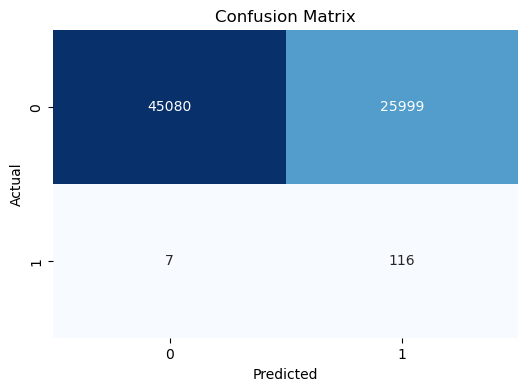

In [107]:
# Criar o gráfico
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_LR_ruNM, annot=True, fmt="d", cmap="Blues", cbar=False)

# Adicionar labels e título
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Realizando o Oversampling nos dados

In [108]:
# Definindo
ros = RandomOverSampler(random_state=42, shrinkage=0.003)

# Criando a amostra dos dados
X_train_RO, y_train_RO = ros.fit_resample(X_train, y_train)

In [109]:
y_train_RO.value_counts()

0    213236
1    213236
Name: Class, dtype: int64

In [110]:
# Definindo os modelos:
clf_RF_RO = RandomForestClassifier()
clf_LR_RO = LogisticRegression()

# Treinando os modelos:
clf_RF_RO = clf_RF_RO.fit(X_train_RO, y_train_RO)
clf_LR_RO = clf_LR_RO.fit(X_train_RO, y_train_RO)

# Realizando a previsão dos dados de teste:
y_pred_RF_RO = clf_RF_RO.predict(X_test)
y_pred_LR_RO = clf_LR_RO.predict(X_test)


C:\Users\Yago\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
# Calculando a Acurácia:
accuracy_RF_RO = accuracy_score(y_test, y_pred_RF_RO)*100
accuracy_LR_RO = accuracy_score(y_test, y_pred_LR_RO)*100

print(f'Acurácia RF_RO: {accuracy_RF_RO:.2f} %')
print(f'Acurácia LR_RO: {accuracy_LR_RO:.2f} % \n')

# Precisão:
precision_RF_RO = precision_score(y_test, y_pred_RF_RO)
precision_LR_RO = precision_score(y_test, y_pred_LR_RO)
print(f'precision_RF_RO: {precision_RF_RO}')
print(f'precision_LR_RO: {precision_LR_RO}\n')

# Recall:
recall_RF_RO = recall_score(y_test,y_pred_RF_RO)
recall_LR_RO = recall_score(y_test,y_pred_LR_RO)
print(f'recall_RF_RO: {recall_RF_RO}')
print(f'recall_LR_RO: {recall_LR_RO}\n')

# F1:
F1_RF_RO = metrics.f1_score(y_test, y_pred_RF_RO)
F1_LR_RO = metrics.f1_score(y_test, y_pred_LR_RO)
print(f'F1_RF_RO: {F1_RF_RO}')
print(f'F1_LR_RO: {F1_LR_RO}\n')

# Matriz de confusão:
confusion_matrix_RF_RO = confusion_matrix(y_test, y_pred_RF_RO)
confusion_matrix_LR_RO = confusion_matrix(y_test, y_pred_LR_RO)
print(f'RF_RO:\n {confusion_matrix_RF_RO}\n')
print(f'LR_RO:\n {confusion_matrix_LR_RO}\n')

Acurácia RF_RO: 99.95 %
Acurácia LR_RO: 97.68 % 

precision_RF_RO: 0.9587628865979382
precision_LR_RO: 0.062356979405034325

recall_RF_RO: 0.7560975609756098
recall_LR_RO: 0.8861788617886179

F1_RF_RO: 0.8454545454545456
F1_LR_RO: 0.11651523249599145

RF_RO:
 [[71075     4]
 [   30    93]]

LR_RO:
 [[69440  1639]
 [   14   109]]



In [112]:
data = {
     'Modelo'  :        ['RF_init',  
                         'RF_RU',
                         'RF_RU_CC',
                         'RF_RU_NM',
                         'RF_RO',
                         'LR_init',
                         'LR_RU',
                         'LR_RU_CC',
                         'LR_RU_NM',
                         'LR_RO'
                        ],
    
     'Acurácia':        [round(accuracy_RF, 4),
                         round(accuracy_RF_RU, 4),
                         round(accuracy_RF_ruCC, 4),
                         round(accuracy_RF_ruNM, 4),
                         round(accuracy_RF_RO, 4),
                         round(accuracy_LR, 4),
                         round(accuracy_LR_RU, 4),
                         round(accuracy_LR_ruCC, 4),
                         round(accuracy_LR_ruNM, 4),
                         round(accuracy_LR_RO, 4)
                        ],
    
     'Precisão':        [round(precision_RF, 4),
                         round(precision_RF_RU, 4),
                         round(precision_RF_ruCC, 4),
                         round(precision_RF_ruNM, 4),
                         round(precision_RF_RO, 4),
                         round(precision_LR, 4),
                         round(precision_LR_RU, 4),
                         round(precision_LR_ruCC, 4),
                         round(precision_LR_ruNM, 4),
                         round(precision_LR_RO, 4)
                        ],
    
     'Recall'  :        [round(recall_RF, 4),
                         round(recall_RF_RU, 4),
                         round(recall_RF_ruCC, 4),
                         round(recall_RF_ruNM, 4),
                         round(recall_RF_RO, 4),
                         round(recall_LR, 4),
                         round(recall_LR_RU, 4),
                         round(recall_LR_ruCC, 4),
                         round(recall_LR_ruNM, 4),
                         round(recall_LR_RO, 4)
                        ],
    
     'F1'      :        [round(F1_RF, 4),
                         round(F1_RF_RU, 4),
                         round(F1_RF_ruCC, 4),
                         round(F1_RF_ruNM, 4),
                         round(F1_RF_RO, 4),
                         round(F1_LR, 4),
                         round(F1_LR_RU, 4),
                         round(F1_LR_ruCC, 4),
                         round(F1_LR_ruNM, 4),
                         round(F1_LR_RO, 4)
                        ],
    
     'Matriz-confusão': [confusion_matrix_RF,
                         confusion_matrix_RF_RU,
                         confusion_matrix_RF_ruCC,
                         confusion_matrix_RF_ruNM,
                         confusion_matrix_RF_RO,
                         confusion_matrix_LR,
                         confusion_matrix_LR_RU,
                         confusion_matrix_LR_ruCC,
                         confusion_matrix_LR_ruNM,
                         confusion_matrix_LR_RO
                        ]
}

In [113]:
df_1 = pd.DataFrame(data)
df_1

,Modelo,Acurácia,Precisão,Recall,F1,Matriz-confusão
0,RF_init,99.9579,0.9429,0.8049,0.8684,"[[71073, 6], [24, 99]]"
1,RF_RU,97.6194,0.0609,0.8862,0.1140,"[[69398, 1681], [14, 109]]"
2,RF_RU_CC,71.1595,0.0056,0.9431,0.0112,"[[50551, 20528], [7, 116]]"
3,RF_RU_NM,4.6642,0.0018,0.9756,0.0035,"[[3201, 67878], [3, 120]]"
4,RF_RO,99.9522,0.9588,0.7561,0.8455,"[[71075, 4], [30, 93]]"
5,LR_init,99.9157,0.8462,0.6260,0.7196,"[[71065, 14], [46, 77]]"
6,LR_RU,97.0675,0.0503,0.8943,0.0953,"[[69004, 2075], [13, 110]]"
7,LR_RU_CC,95.7894,0.0343,0.8618,0.0660,"[[68098, 2981], [17, 106]]"
8,LR_RU_NM,63.4757,0.0044,0.9431,0.0088,"[[45080, 25999], [7, 116]]"
9,LR_RO,97.6784,0.0624,0.8862,0.1165,"[[69440, 1639], [14, 109]]"


### SMOTE

In [114]:
# Definindo
sm = SMOTE(random_state=42)

# Criando a amostra dos dados
X_train_roSM, y_train_roSM = sm.fit_resample(X_train, y_train)

In [115]:
# Definindo os modelos:
clf_RF_RO = RandomForestClassifier()
clf_LR_RO = LogisticRegression()

# Treinando os modelos:
clf_RF_RO = clf_RF_RO.fit(X_train_roSM, y_train_roSM)
clf_LR_RO = clf_LR_RO.fit(X_train_roSM, y_train_roSM)

# Realizando a previsão dos dados de teste:
y_pred_RF_roSM = clf_RF_RO.predict(X_test)
y_pred_LR_roSM = clf_LR_RO.predict(X_test)

C:\Users\Yago\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
# Calculando a Acurácia:
accuracy_RF_roSM = accuracy_score(y_test, y_pred_RF_roSM)*100
accuracy_LR_roSM = accuracy_score(y_test, y_pred_LR_roSM)*100

print(f'Acurácia RF_roSM: {accuracy_RF_roSM:.2f} %')
print(f'Acurácia LR_roSM: {accuracy_LR_roSM:.2f} % \n')

# Precisão:
precision_RF_roSM = precision_score(y_test, y_pred_RF_roSM)
precision_LR_roSM = precision_score(y_test, y_pred_LR_roSM)
print(f'precision_RF_roSM: {precision_RF_roSM}')
print(f'precision_LR_roSM: {precision_LR_roSM}\n')

# Recall:
recall_RF_roSM = recall_score(y_test,y_pred_RF_roSM)
recall_LR_roSM = recall_score(y_test,y_pred_LR_roSM)
print(f'recall_RF_roSM: {recall_RF_roSM}')
print(f'recall_LR_roSM: {recall_LR_roSM}\n')

# F1:
F1_RF_roSM = metrics.f1_score(y_test, y_pred_RF_roSM)
F1_LR_roSM = metrics.f1_score(y_test, y_pred_LR_roSM)
print(f'F1_RF_roSM: {F1_RF_roSM}')
print(f'F1_LR_roSM: {F1_LR_roSM}\n')

# Matriz de confusão:
confusion_matrix_RF_roSM = confusion_matrix(y_test, y_pred_RF_roSM)
confusion_matrix_LR_roSM = confusion_matrix(y_test, y_pred_LR_roSM)
print(f'RF_roSM:\n {confusion_matrix_RF_roSM}\n')
print(f'LR_roSM:\n {confusion_matrix_LR_roSM}\n')

Acurácia RF_roSM: 99.94 %
Acurácia LR_roSM: 97.51 % 

precision_RF_roSM: 0.8660714285714286
precision_LR_roSM: 0.058257616247995726

recall_RF_roSM: 0.7886178861788617
recall_LR_roSM: 0.8861788617886179

F1_RF_roSM: 0.825531914893617
F1_LR_roSM: 0.10932798395185557

RF_roSM:
 [[71064    15]
 [   26    97]]

LR_roSM:
 [[69317  1762]
 [   14   109]]



In [117]:
data = {
     'Modelo'  :        ['RF_init',  
                         'RF_RU',
                         'RF_RU_CC',
                         'RF_RU_NM',
                         'RF_RO',
                         'RF_roSM',
                         'LR_init',
                         'LR_RU',
                         'LR_RU_CC',
                         'LR_RU_NM',
                         'LR_RO',
                         'LR_roSM'
                        ],
    
     'Acurácia':        [round(accuracy_RF, 4),
                         round(accuracy_RF_RU, 4),
                         round(accuracy_RF_ruCC, 4),
                         round(accuracy_RF_ruNM, 4),
                         round(accuracy_RF_RO, 4),
                         round(accuracy_RF_roSM, 4),
                         round(accuracy_LR, 4),
                         round(accuracy_LR_RU, 4),
                         round(accuracy_LR_ruCC, 4),
                         round(accuracy_LR_ruNM, 4),
                         round(accuracy_LR_RO, 4),
                         round(accuracy_LR_roSM, 4)
                        ],
    
     'Precisão':        [round(precision_RF, 4),
                         round(precision_RF_RU, 4),
                         round(precision_RF_ruCC, 4),
                         round(precision_RF_ruNM, 4),
                         round(precision_RF_RO, 4),
                         round(precision_RF_roSM, 4),
                         round(precision_LR, 4),
                         round(precision_LR_RU, 4),
                         round(precision_LR_ruCC, 4),
                         round(precision_LR_ruNM, 4),
                         round(precision_LR_RO, 4),
                         round(precision_LR_roSM, 4)
                        ],
    
     'Recall'  :        [round(recall_RF, 4),
                         round(recall_RF_RU, 4),
                         round(recall_RF_ruCC, 4),
                         round(recall_RF_ruNM, 4),
                         round(recall_RF_RO, 4),
                         round(recall_RF_roSM, 4),
                         round(recall_LR, 4),
                         round(recall_LR_RU, 4),
                         round(recall_LR_ruCC, 4),
                         round(recall_LR_ruNM, 4),
                         round(recall_LR_RO, 4),
                         round(recall_LR_roSM, 4)
                        ],
    
     'F1'      :        [round(F1_RF, 4),
                         round(F1_RF_RU, 4),
                         round(F1_RF_ruCC, 4),
                         round(F1_RF_ruNM, 4),
                         round(F1_RF_RO, 4),
                         round(F1_RF_roSM, 4),
                         round(F1_LR, 4),
                         round(F1_LR_RU, 4),
                         round(F1_LR_ruCC, 4),
                         round(F1_LR_ruNM, 4),
                         round(F1_LR_RO, 4),
                         round(F1_LR_roSM, 4)
                        ],
    
     'Matriz-confusão': [confusion_matrix_RF,
                         confusion_matrix_RF_RU,
                         confusion_matrix_RF_ruCC,
                         confusion_matrix_RF_ruNM,
                         confusion_matrix_RF_RO,
                         confusion_matrix_RF_roSM,
                         confusion_matrix_LR,
                         confusion_matrix_LR_RU,
                         confusion_matrix_LR_ruCC,
                         confusion_matrix_LR_ruNM,
                         confusion_matrix_LR_RO,
                         confusion_matrix_LR_roSM
                        ]
}

In [118]:
df_1 = pd.DataFrame(data)
df_1

,Modelo,Acurácia,Precisão,Recall,F1,Matriz-confusão
0,RF_init,99.9579,0.9429,0.8049,0.8684,"[[71073, 6], [24, 99]]"
1,RF_RU,97.6194,0.0609,0.8862,0.1140,"[[69398, 1681], [14, 109]]"
2,RF_RU_CC,71.1595,0.0056,0.9431,0.0112,"[[50551, 20528], [7, 116]]"
3,RF_RU_NM,4.6642,0.0018,0.9756,0.0035,"[[3201, 67878], [3, 120]]"
4,RF_RO,99.9522,0.9588,0.7561,0.8455,"[[71075, 4], [30, 93]]"
5,RF_roSM,99.9424,0.8661,0.7886,0.8255,"[[71064, 15], [26, 97]]"
6,LR_init,99.9157,0.8462,0.6260,0.7196,"[[71065, 14], [46, 77]]"
7,LR_RU,97.0675,0.0503,0.8943,0.0953,"[[69004, 2075], [13, 110]]"
8,LR_RU_CC,95.7894,0.0343,0.8618,0.0660,"[[68098, 2981], [17, 106]]"
9,LR_RU_NM,63.4757,0.0044,0.9431,0.0088,"[[45080, 25999], [7, 116]]"


### ADASYN

In [119]:
# Definindo
ada = ADASYN(random_state=42)

# Criando a amostra dos dados
X_train_roADA, y_train_roADA = ada.fit_resample(X_train, y_train)

In [120]:
# Definindo os modelos:
clf_RF_RO = RandomForestClassifier()
clf_LR_RO = LogisticRegression()

# Treinando os modelos:
clf_RF_RO = clf_RF_RO.fit(X_train_roADA, y_train_roADA)
clf_LR_RO = clf_LR_RO.fit(X_train_roADA, y_train_roADA)

# Realizando a previsão dos dados de teste:
y_pred_RF_roADA = clf_RF_RO.predict(X_test)
y_pred_LR_roADA = clf_LR_RO.predict(X_test)

C:\Users\Yago\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [121]:
# Calculando a Acurácia:
accuracy_RF_roADA = accuracy_score(y_test, y_pred_RF_roADA)*100
accuracy_LR_roADA = accuracy_score(y_test, y_pred_LR_roADA)*100

print(f'Acurácia RF_roADA: {accuracy_RF_roADA:.2f} %')
print(f'Acurácia LR_roADA: {accuracy_LR_roADA:.2f} % \n')

# Precisão:
precision_RF_roADA = precision_score(y_test, y_pred_RF_roADA)
precision_LR_roADA = precision_score(y_test, y_pred_LR_roADA)
print(f'precision_RF_roADA: {precision_RF_roADA}')
print(f'precision_LR_roADA: {precision_LR_roADA}\n')

# Recall:
recall_RF_roADA = recall_score(y_test,y_pred_RF_roADA)
recall_LR_roADA = recall_score(y_test,y_pred_LR_roADA)
print(f'recall_RF_roADA: {recall_RF_roADA}')
print(f'recall_LR_roADA: {recall_LR_roADA}\n')

# F1:
F1_RF_roADA = metrics.f1_score(y_test, y_pred_RF_roADA)
F1_LR_roADA = metrics.f1_score(y_test, y_pred_LR_roADA)
print(f'F1_RF_roADA: {F1_RF_roADA}')
print(f'F1_LR_roADA: {F1_LR_roADA}\n')

# Matriz de confusão:
confusion_matrix_RF_roADA = confusion_matrix(y_test, y_pred_RF_roADA)
confusion_matrix_LR_roADA = confusion_matrix(y_test, y_pred_LR_roADA)
print(f'RF_roADA:\n {confusion_matrix_RF_roADA}\n')
print(f'LR_roADA:\n {confusion_matrix_LR_roADA}\n')

Acurácia RF_roADA: 99.94 %
Acurácia LR_roADA: 91.72 % 

precision_RF_roADA: 0.8558558558558559
precision_LR_roADA: 0.018679119412941963

recall_RF_roADA: 0.7723577235772358
recall_LR_roADA: 0.9105691056910569

F1_RF_roADA: 0.811965811965812
F1_LR_roADA: 0.03660728877267527

RF_roADA:
 [[71063    16]
 [   28    95]]

LR_roADA:
 [[65195  5884]
 [   11   112]]



In [122]:
data = {
     'Modelo'  :        ['RF_init',  
                         'RF_RU',
                         'RF_RU_CC',
                         'RF_RU_NM',
                         'RF_RO',
                         'RF_roSM',
                         'RF_rosADA',
                         'LR_init',
                         'LR_RU',
                         'LR_RU_CC',
                         'LR_RU_NM',
                         'LR_RO',
                         'LR_roSM',
                         'LR_rosADA'
                        ],
    
     'Acurácia':        [round(accuracy_RF, 4),
                         round(accuracy_RF_RU, 4),
                         round(accuracy_RF_ruCC, 4),
                         round(accuracy_RF_ruNM, 4),
                         round(accuracy_RF_RO, 4),
                         round(accuracy_RF_roSM, 4),
                         round(accuracy_RF_roADA, 4),
                         round(accuracy_LR, 4),
                         round(accuracy_LR_RU, 4),
                         round(accuracy_LR_ruCC, 4),
                         round(accuracy_LR_ruNM, 4),
                         round(accuracy_LR_RO, 4),
                         round(accuracy_LR_roSM, 4),
                         round(accuracy_LR_roADA, 4)
                        ],
    
     'Precisão':        [round(precision_RF, 4),
                         round(precision_RF_RU, 4),
                         round(precision_RF_ruCC, 4),
                         round(precision_RF_ruNM, 4),
                         round(precision_RF_RO, 4),
                         round(precision_RF_roSM, 4),
                         round(precision_RF_roADA, 4),
                         round(precision_LR, 4),
                         round(precision_LR_RU, 4),
                         round(precision_LR_ruCC, 4),
                         round(precision_LR_ruNM, 4),
                         round(precision_LR_RO, 4),
                         round(precision_LR_roSM, 4),
                         round(precision_LR_roADA, 4)
                        ],
    
     'Recall'  :        [round(recall_RF, 4),
                         round(recall_RF_RU, 4),
                         round(recall_RF_ruCC, 4),
                         round(recall_RF_ruNM, 4),
                         round(recall_RF_RO, 4),
                         round(recall_RF_roSM, 4),
                         round(recall_RF_roADA, 4),
                         round(recall_LR, 4),
                         round(recall_LR_RU, 4),
                         round(recall_LR_ruCC, 4),
                         round(recall_LR_ruNM, 4),
                         round(recall_LR_RO, 4),
                         round(recall_LR_roSM, 4),
                         round(recall_LR_roADA, 4)
                        ],
    
     'F1'      :        [round(F1_RF, 4),
                         round(F1_RF_RU, 4),
                         round(F1_RF_ruCC, 4),
                         round(F1_RF_ruNM, 4),
                         round(F1_RF_RO, 4),
                         round(F1_RF_roSM, 4),
                         round(F1_RF_roADA, 4),
                         round(F1_LR, 4),
                         round(F1_LR_RU, 4),
                         round(F1_LR_ruCC, 4),
                         round(F1_LR_ruNM, 4),
                         round(F1_LR_RO, 4),
                         round(F1_LR_roSM, 4),
                         round(F1_LR_roADA, 4)
                        ],
    
     'Matriz-confusão': [confusion_matrix_RF,
                         confusion_matrix_RF_RU,
                         confusion_matrix_RF_ruCC,
                         confusion_matrix_RF_ruNM,
                         confusion_matrix_RF_RO,
                         confusion_matrix_RF_roSM,
                         confusion_matrix_RF_roADA,
                         confusion_matrix_LR,
                         confusion_matrix_LR_RU,
                         confusion_matrix_LR_ruCC,
                         confusion_matrix_LR_ruNM,
                         confusion_matrix_LR_RO,
                         confusion_matrix_LR_roSM,
                         confusion_matrix_LR_roADA
                        ]
}

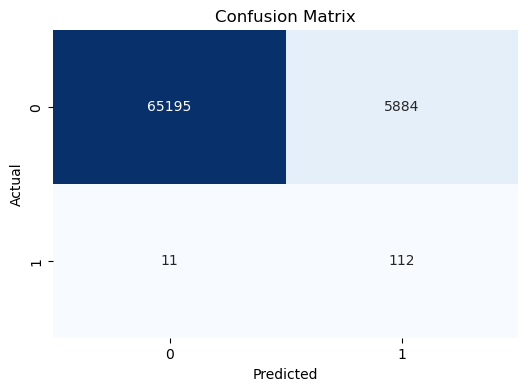

In [123]:
# Criar o gráfico
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_LR_roADA, annot=True, fmt="d", cmap="Blues", cbar=False)

# Adicionar labels e título
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [124]:
df_1 = pd.DataFrame(data)
df_1

,Modelo,Acurácia,Precisão,Recall,F1,Matriz-confusão
0,RF_init,99.9579,0.9429,0.8049,0.8684,"[[71073, 6], [24, 99]]"
1,RF_RU,97.6194,0.0609,0.8862,0.1140,"[[69398, 1681], [14, 109]]"
2,RF_RU_CC,71.1595,0.0056,0.9431,0.0112,"[[50551, 20528], [7, 116]]"
3,RF_RU_NM,4.6642,0.0018,0.9756,0.0035,"[[3201, 67878], [3, 120]]"
4,RF_RO,99.9522,0.9588,0.7561,0.8455,"[[71075, 4], [30, 93]]"
5,RF_roSM,99.9424,0.8661,0.7886,0.8255,"[[71064, 15], [26, 97]]"
6,RF_rosADA,99.9382,0.8559,0.7724,0.8120,"[[71063, 16], [28, 95]]"
7,LR_init,99.9157,0.8462,0.6260,0.7196,"[[71065, 14], [46, 77]]"
8,LR_RU,97.0675,0.0503,0.8943,0.0953,"[[69004, 2075], [13, 110]]"
9,LR_RU_CC,95.7894,0.0343,0.8618,0.0660,"[[68098, 2981], [17, 106]]"


# Testando os Hiperparâmetros

## Logistic Regression

In [125]:
# Realizando o Undersampling:
rus = RandomUnderSampler()

X_train_LR, y_train_LR = rus.fit_resample(X_train, y_train)


In [126]:
parametros = {
    'C': [0.1, 1, 10],
    'fit_intercept': [True, False],
    'random_state': [42],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100],
    'multi_class': ['auto']
}


In [127]:
'''
# Cuidado para não obter um overfit
# Utilizando os parâmetros do modelo:
parametros = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'dual': [True, False],
    'tol': ['0.001','0.0001','0.00001'],
    'C':   [0.01, 0.1, 1, 5, 10, 50, 100, 500, 1000],
    'fit_intercept': [True, False],
    'intercept_scaling': [0.01, 0.1, 1, 5, 10, 50, 100, 500, 1000],
    'class_weight': ['balanced', None],
    'random_state': [list(range(44))],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 150, 200],
    'multi_class': ['auto', 'ovr','multinomial'],
    'verbose': [list(range(11))],
    'warm_start': [True, False]
}
'''

"\n# Cuidado para não obter um overfit\n# Utilizando os parâmetros do modelo:\nparametros = {\n    'penalty': ['l1', 'l2', 'elasticnet', None],\n    'dual': [True, False],\n    'tol': ['0.001','0.0001','0.00001'],\n    'C':   [0.01, 0.1, 1, 5, 10, 50, 100, 500, 1000],\n    'fit_intercept': [True, False],\n    'intercept_scaling': [0.01, 0.1, 1, 5, 10, 50, 100, 500, 1000],\n    'class_weight': ['balanced', None],\n    'random_state': [list(range(44))],\n    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],\n    'max_iter': [50, 100, 150, 200],\n    'multi_class': ['auto', 'ovr','multinomial'],\n    'verbose': [list(range(11))],\n    'warm_start': [True, False]\n}\n"

In [128]:
# Selecionando a SVC
model_LR = LogisticRegression(random_state=42)

In [129]:

# Criando um novo classificador usando os parâemetrosque escolhemos anteriormente:
clf_GS_LR = GridSearchCV(model_LR, 
                         parametros,
                         scoring='recall')

In [130]:
# Fazendo o fit dos dados:
clf_GS_LR = clf_GS_LR.fit(X_train_LR, y_train_LR)

C:\Users\Yago\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [131]:
# Visualizando os melhores parâmetros definidos pelo GridSearchCV:
clf_GS_LR.best_params_

{'C': 0.1,
 'fit_intercept': False,
 'max_iter': 100,
 'multi_class': 'auto',
 'random_state': 42,
 'solver': 'lbfgs'}

In [132]:
# Usando esse modelo para fazer as previsões:
y_pred_GD_LR = clf_GS_LR.predict(X_test)

In [133]:
# métricas

In [134]:
# Visualizando tudo que foi feito:
df_results = pd.DataFrame(clf_GS_LR.cv_results_)

In [135]:
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_fit_intercept,param_max_iter,param_multi_class,param_random_state,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.055350,0.085225,0.003668,0.004367,0.1,True,100,auto,42,lbfgs,"{'C': 0.1, 'fit_intercept': True, 'max_iter': ...",0.945946,0.918919,0.945946,0.821918,0.932432,0.913032,0.046647,12
1,0.208247,0.400481,0.002201,0.000751,0.1,True,100,auto,42,liblinear,"{'C': 0.1, 'fit_intercept': True, 'max_iter': ...",0.945946,0.918919,0.945946,0.835616,0.945946,0.918475,0.042731,11
2,0.013801,0.006721,0.001795,0.000399,0.1,False,100,auto,42,lbfgs,"{'C': 0.1, 'fit_intercept': False, 'max_iter':...",0.986486,0.918919,0.972973,0.849315,0.959459,0.937431,0.049522,1
3,0.003196,0.000397,0.001791,0.000409,0.1,False,100,auto,42,liblinear,"{'C': 0.1, 'fit_intercept': False, 'max_iter':...",0.986486,0.918919,0.972973,0.849315,0.959459,0.937431,0.049522,1
4,0.030685,0.017557,0.001590,0.000485,1,True,100,auto,42,lbfgs,"{'C': 1, 'fit_intercept': True, 'max_iter': 10...",0.945946,0.918919,0.959459,0.835616,0.932432,0.918475,0.043577,10
5,0.003988,0.000016,0.001996,0.000001,1,True,100,auto,42,liblinear,"{'C': 1, 'fit_intercept': True, 'max_iter': 10...",0.945946,0.918919,0.959459,0.835616,0.945946,0.921177,0.044762,7
6,0.023635,0.017470,0.002004,0.000012,1,False,100,auto,42,lbfgs,"{'C': 1, 'fit_intercept': False, 'max_iter': 1...",0.959459,0.891892,0.972973,0.849315,0.945946,0.923917,0.046360,3
7,0.003905,0.000503,0.001791,0.000396,1,False,100,auto,42,liblinear,"{'C': 1, 'fit_intercept': False, 'max_iter': 1...",0.959459,0.891892,0.972973,0.849315,0.945946,0.923917,0.046360,3
8,0.030305,0.002596,0.001608,0.000500,10,True,100,auto,42,lbfgs,"{'C': 10, 'fit_intercept': True, 'max_iter': 1...",0.945946,0.905405,0.972973,0.835616,0.945946,0.921177,0.047915,7
9,0.004981,0.000011,0.001800,0.000403,10,True,100,auto,42,liblinear,"{'C': 10, 'fit_intercept': True, 'max_iter': 1...",0.945946,0.905405,0.972973,0.835616,0.945946,0.921177,0.047915,7


In [136]:
# Exportando
pd.DataFrame(clf_GS_LR.cv_results_).to_csv('resultados_LR.csv')

## Random Florest

In [137]:
# Realizando o Undersampling:
rus = RandomUnderSampler()

X_train_RF, y_train_RF = rus.fit_resample(X_train, y_train)

In [138]:
parametros = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],   
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],    
    'bootstrap': [True, False],      
    'random_state': [42]              
}

In [139]:
# Selecionando a SVC
model_RF = RandomForestClassifier(random_state=42)

In [140]:

# Criando um novo classificador usando os parâemetrosque escolhemos anteriormente:
clf_GS_RF = GridSearchCV(model_RF, 
                         parametros,
                         scoring='recall')

In [141]:
# Fazendo o fit dos dados:
clf_GS_RF = clf_GS_RF.fit(X_train_RF, y_train_RF)

In [142]:
# Visualizando os melhores parâmetros definidos pelo GridSearchCV:
clf_GS_RF.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10,
 'random_state': 42}

In [143]:
# Visualizando tudo que foi feito:
df_results = pd.DataFrame(clf_GS_LR.cv_results_)
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_fit_intercept,param_max_iter,param_multi_class,param_random_state,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.055350,0.085225,0.003668,0.004367,0.1,True,100,auto,42,lbfgs,"{'C': 0.1, 'fit_intercept': True, 'max_iter': ...",0.945946,0.918919,0.945946,0.821918,0.932432,0.913032,0.046647,12
1,0.208247,0.400481,0.002201,0.000751,0.1,True,100,auto,42,liblinear,"{'C': 0.1, 'fit_intercept': True, 'max_iter': ...",0.945946,0.918919,0.945946,0.835616,0.945946,0.918475,0.042731,11
2,0.013801,0.006721,0.001795,0.000399,0.1,False,100,auto,42,lbfgs,"{'C': 0.1, 'fit_intercept': False, 'max_iter':...",0.986486,0.918919,0.972973,0.849315,0.959459,0.937431,0.049522,1
3,0.003196,0.000397,0.001791,0.000409,0.1,False,100,auto,42,liblinear,"{'C': 0.1, 'fit_intercept': False, 'max_iter':...",0.986486,0.918919,0.972973,0.849315,0.959459,0.937431,0.049522,1
4,0.030685,0.017557,0.001590,0.000485,1,True,100,auto,42,lbfgs,"{'C': 1, 'fit_intercept': True, 'max_iter': 10...",0.945946,0.918919,0.959459,0.835616,0.932432,0.918475,0.043577,10
5,0.003988,0.000016,0.001996,0.000001,1,True,100,auto,42,liblinear,"{'C': 1, 'fit_intercept': True, 'max_iter': 10...",0.945946,0.918919,0.959459,0.835616,0.945946,0.921177,0.044762,7
6,0.023635,0.017470,0.002004,0.000012,1,False,100,auto,42,lbfgs,"{'C': 1, 'fit_intercept': False, 'max_iter': 1...",0.959459,0.891892,0.972973,0.849315,0.945946,0.923917,0.046360,3
7,0.003905,0.000503,0.001791,0.000396,1,False,100,auto,42,liblinear,"{'C': 1, 'fit_intercept': False, 'max_iter': 1...",0.959459,0.891892,0.972973,0.849315,0.945946,0.923917,0.046360,3
8,0.030305,0.002596,0.001608,0.000500,10,True,100,auto,42,lbfgs,"{'C': 10, 'fit_intercept': True, 'max_iter': 1...",0.945946,0.905405,0.972973,0.835616,0.945946,0.921177,0.047915,7
9,0.004981,0.000011,0.001800,0.000403,10,True,100,auto,42,liblinear,"{'C': 10, 'fit_intercept': True, 'max_iter': 1...",0.945946,0.905405,0.972973,0.835616,0.945946,0.921177,0.047915,7


In [144]:
# Exportando
pd.DataFrame(clf_GS_RF.cv_results_).to_csv('resultados_RF.csv')

# References

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud